# НАША ЗАДАЧА

**Анализ удовлетворенности клиентов климатическим оборудованием**


---


**Цель проекта:**
Провести комплексный анализ данных о комфорте использования климатического оборудования в офисах различных стран и городов. На основе полученных результатов определить, в какой тип оборудования (кондиционирование, вентиляция, смешанный тип) стоит инвестировать больше ресурсов для повышения удовлетворенности клиентов в зависимости от региона. Также выявить ключевые факторы, влияющие на комфорт пользователей, и дать рекомендации по развитию бизнеса в разных регионах.

---

**Ключевые вопросы для анализа**
- Какие типы климатического оборудования наиболее востребованы в разных регионах?
- Как возраст, пол и климатические условия влияют на предпочтения пользователей?
- Какие факторы сильнее всего влияют на оценку комфорта?
- Где наблюдаются наибольшие проблемы с комфортом (страны, типы оборудования)?
- Какие рекомендации можно дать для улучшения продукции и сервиса в разных регионах?

---

**Используемые данные**
Данные содержат информацию о климатических условиях, типах охлаждения/обогрева, демографических характеристиках респондентов и их субъективных оценках комфорта. Полный список переменных приведен в описании проекта.

---

**Ожидаемый результат**
- Отчет с анализом данных, проверкой гипотез и выводами.
- Дашборд для визуализации ключевых метрик.
- Презентация с рекомендациями для руководства.


# IMPORTS

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
import re

import scipy.stats as st
from scipy.stats import shapiro

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

# Настройка ноутбука

In [2]:
pd.set_option('display.max_rows', None)  # Показать все строки
pd.set_option('display.max_columns', None)  # Показать все столбцы
pd.set_option('display.width', None)  # Автоматически подбирать ширину
pd.set_option('display.max_colwidth', None)  # Показать полное содержимое ячеек

# FILE

In [3]:
FILEPATH = "data/data.csv"

# DATA FRAME

# Базовая подготовка датасета к проведению рассчетов

In [4]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]



In [5]:
df = pd.read_csv(
    FILEPATH,
    sep=';',
    decimal='.',
    header=0,
    names=column_names
)

# Описание нашего DF

ВСЕ ДАННЫЕ О DF

In [6]:
df.dtypes

year                                   float64
season                                  object
climate                                 object
city                                    object
country                                 object
cooling_method                          object
mixed_cooling_mode                      object
heating_method                          object
age                                    float64
gender                                  object
temperature_feeling                    float64
temperature_feeling_bool               float64
preferred_temperature_change            object
air_movement_feeling_bool              float64
preferred_air_movement_change           object
comfort_rating                         float64
clothing_insulation                    float64
indoor_air_temperature                 float64
outdoor_air_temperature                float64
relative_humidity                      float64
air_speed                              float64
height       

Есть данные, неправильного типа(year,age и тд). В дальнейшем нужно будет привести к правильному типу данных.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   year                                 484 non-null    float64
 1   season                               484 non-null    object 
 2   climate                              484 non-null    object 
 3   city                                 484 non-null    object 
 4   country                              484 non-null    object 
 5   cooling_method                       484 non-null    object 
 6   mixed_cooling_mode                   337 non-null    object 
 7   heating_method                       222 non-null    object 
 8   age                                  413 non-null    float64
 9   gender                               412 non-null    object 
 10  temperature_feeling                  484 non-null    float64
 11  temperature_feeling_bool        

**Столбцы с пропусками:**

mixed_cooling_mode: 337 непустых значений (пропуски ~30%). Возможно, связано с тем, что данные заполняются только для смешанного типа охлаждения.

heating_method: 222 непустых значения (пропуски ~54%). Может отсутствовать, когда исследование проводилось в жаркий сезон.

age: 413 непустых значений (пропуски ~15%).

gender: 412 непустых значений (пропуски ~15%).

air_movement_feeling_bool: 198 непустых значений (пропуски ~59%). Возможно, заполнялось только для определенных условий.

comfort_rating: 215 непустых значений (пропуски ~56%). Критично для анализа удовлетворенности.

outdoor_air_temperature: 72 непустых значения (пропуски ~85%). Возможно, измерялась не во всех случаях.

**Размеры нашего DF**

Смотрим сразу на размеры нашего DF. Впоследствии посмотрим на размеры нашего DF после обработки

In [8]:
df.shape

(484, 30)

Видим размеры нашего Data Frame сначала. После обработки увидим сколько осталось от начальных размеров

In [9]:
df.describe()

,year,age,temperature_feeling,temperature_feeling_bool,air_movement_feeling_bool,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
count,484.000000,413.000000,484.000000,484.000000,198.000000,215.000000,484.000000,484.000000,72.000000,484.000000,484.000000,143.000000,214.000000,72.000000,146.000000,279.000000,157.000000,79.00000,484.000000,484.000000
mean,2011.033058,40.634383,0.203306,0.789256,0.752525,4.772093,0.634587,26.072107,24.104167,52.973760,0.760558,164.411678,65.471963,0.513889,0.527397,0.247312,0.184713,0.78481,27.389669,0.105372
std,0.922988,11.001301,1.091976,0.408259,0.432639,1.261161,0.253103,7.681363,0.604546,13.036204,4.921106,21.273235,11.574079,0.503315,0.500967,0.432225,0.389307,0.41358,19.469562,0.440276
min,2010.000000,22.000000,-3.000000,0.000000,0.000000,1.000000,0.360000,16.200000,22.800000,23.800000,0.000000,5.230000,42.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.500000,0.000000
25%,2010.000000,35.000000,0.000000,1.000000,1.000000,4.000000,0.460000,23.800000,23.800000,42.775000,0.060000,160.000000,57.000000,0.000000,0.000000,0.000000,0.000000,1.00000,22.000000,0.000000
50%,2011.000000,42.000000,0.000000,1.000000,1.000000,5.000000,0.590000,24.600000,24.100000,53.750000,0.100000,165.100000,65.000000,1.000000,1.000000,0.000000,0.000000,1.00000,22.000000,0.000000
75%,2012.000000,45.000000,1.000000,1.000000,1.000000,6.000000,0.700000,25.900000,24.400000,62.325000,0.140000,172.700000,72.750000,1.000000,1.000000,0.000000,0.000000,1.00000,30.800000,0.000000
max,2012.000000,65.000000,3.000000,1.000000,1.000000,6.000000,2.080000,77.000000,25.900000,85.100000,63.830000,190.500000,110.000000,1.000000,1.000000,1.000000,1.000000,1.00000,328.000000,3.000000


**Проблемы в данных
Аномалии:**

indoor_air_temperature: 77°C (невозможно в жилом помещении).

air_speed: 63.83 м/с (ураганная скорость — ошибка датчика).

height: 5 см (очевидная ошибка ввода).

average_monthly_outdoor_temperature: 91°C (нереально для земных условий).

**Пропуски:**

Столбцы age, height, weight содержат много пропусков (особенно height — только 143 значения).

**Смещение в оценках комфорта:**

Большинство респондентов ставят высокие оценки (comfort_rating), что может указывать на:

Предвзятость выборки (например, опрашивали только довольных людей).

Некорректную шкалу (слишком узкий диапазон "позитивных" вариантов).

# Исследование данных на качество и предобработка




**Исследование данных на качество и предобработка**
Для проведения исследования необходимо:
- Названия столбцов привести в соответствии с PEP8
- Исследовать типы данных, привести данные к правильному типу, где это необходимо
- Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.
- Проверить данные на явные и неявные (в категориальных столбцах) дубликаты. Обработать дубликаты.
- Провести аналитический и графический анализ данных. Сделать выводы.
- Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.





## Названия столбцов привести в соответствии с PEP8

Названия столбцов привели в соответствии с PEP8

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

Проверяем, что все прошло успешно

In [11]:
df.columns

Index(['year', 'season', 'climate', 'city', 'country', 'cooling_method',
       'mixed_cooling_mode', 'heating_method', 'age', 'gender',
       'temperature_feeling', 'temperature_feeling_bool',
       'preferred_temperature_change', 'air_movement_feeling_bool',
       'preferred_air_movement_change', 'comfort_rating',
       'clothing_insulation', 'indoor_air_temperature',
       'outdoor_air_temperature', 'relative_humidity', 'air_speed', 'height',
       'weight', 'curtains', 'fan_mode', 'window_status', 'door_status',
       'heating_mode', 'average_monthly_outdoor_temperature',
       'number_of_complaints'],
      dtype='object')

## Исследовать типы данных, привести данные к правильному типу, где это необходимо

ДО

In [12]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                     147
heating_method                         262
age                                     71
gender                                  72
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              286
preferred_air_movement_change            0
comfort_rating                         269
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                412
relative_humidity                        0
air_speed                                0
height                                 341
weight                         

In [13]:
def preprocess_data(df):
    """
    Комплексная функция предобработки данных, которая:
    1. Преобразует типы данных в подходящие для анализа
    2. Заменяет специальные значения на читаемые текстовые описания
    3. Обрабатывает пропущенные значения в категориальных столбцах
    
    """
    
    
    def _convert_data_types(df):
        # Категориальные колонки
        categorical_cols = [
            'season', 'climate', 'city', 'country', 'cooling_method',
            'mixed_cooling_mode', 'heating_method', 'gender',
            'preferred_temperature_change', 'preferred_air_movement_change'
        ]
        
        for col in categorical_cols:
            if col in df.columns:
                df[col] = df[col].astype('category')
        
        # Булевы колонки 
        bool_cols = [
            'temperature_feeling_bool', 'air_movement_feeling_bool',
            'curtains', 'fan_mode', 'window_status', 'door_status', 'heating_mode'
        ]
        
        for col in bool_cols:
            if col in df.columns:
                
                df[col] = pd.to_numeric(df[col], errors='coerce').astype('float')
                
                df[col] = df[col].astype('category')
        
        # Числовые колонки
        numeric_cols = [
            'year', 'age', 'temperature_feeling', 'comfort_rating',
            'clothing_insulation', 'indoor_air_temperature', 'outdoor_air_temperature',
            'relative_humidity', 'air_speed', 'height', 'weight',
            'average_monthly_outdoor_temperature', 'number_of_complaints'
        ]
        
        int_cols = ['year', 'age', 'clothing_insulation', 'number_of_complaints', 
                    'height', 'weight', 'comfort_rating']
        
        for col in numeric_cols:
            if col in df.columns:
                if col in int_cols:
                    # Используем Int64 для поддержки NA
                    df[col] = pd.to_numeric(df[col], errors='coerce').round(0).astype('Int64')
                else:
                    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)
        
        return df
    
    
    def _transform_special_columns(df):
        # Преобразуем категориальные и булевы значения
        replacements = {
            'cooling_method': {'NA': 'не применимо'},
            'mixed_cooling_mode': {'NA': 'неприменимо'},
            'heating_method': {'NA': 'отсутствие механического отопления'},
            'temperature_feeling_bool': {0.0: 'неприемлемо', 1.0: 'приемлемо'},
            'air_movement_feeling_bool': {0.0: 'неприемлемо', 1.0: 'приемлемо'},
            'curtains': {0.0: 'открыто', 1.0: 'закрыто'},
            'fan_mode': {0.0: 'выключен', 1.0: 'включен'},
            'window_status': {0.0: 'открыто', 1.0: 'закрыто'},
            'door_status': {0.0: 'открыты', 1.0: 'закрыты'},
            'heating_mode': {0.0: 'выключен', 1.0: 'включен'}
        }
        
        for col, mapping in replacements.items():
            if col in df.columns:
                
                if pd.api.types.is_categorical_dtype(df[col]):
                    new_categories = set(mapping.values()) - set(df[col].cat.categories)
                    if new_categories:
                        df[col] = df[col].cat.add_categories(list(new_categories))
                    df[col] = df[col].replace(mapping)
                else:
                    df[col] = df[col].replace(mapping)
                    df[col] = df[col].astype('category')
        
        # Заменяем оставшиеся NA в булевых столбцах на "нет данных"
        bool_text_cols = ['curtains', 'fan_mode', 'window_status', 'door_status', 'heating_mode']
        for col in bool_text_cols:
            if col in df.columns:
                if 'нет данных' not in df[col].cat.categories:
                    df[col] = df[col].cat.add_categories('нет данных')
                df[col] = df[col].fillna('нет данных')
        
        return df
    
    
    def _handle_categorical_na(df):
        
        na_values = {
            'mixed_cooling_mode': 'not applicable',
            'heating_method': 'No mechanical heating',
            'gender': 'Unknown'
        }
        
        for col, na_value in na_values.items():
            if col in df.columns:
                
                if not pd.api.types.is_categorical_dtype(df[col]):
                    df[col] = df[col].astype('category')
                
                
                if na_value not in df[col].cat.categories:
                    df[col] = df[col].cat.add_categories(na_value)
                
                
                df[col] = df[col].fillna(na_value)
        
        return df
    
    
    df = _convert_data_types(df)
    df = _transform_special_columns(df)
    df = _handle_categorical_na(df)
    
    return df


df = preprocess_data(df)

In [14]:
def map_clothing_insulation(df, column_name='clothing_insulation'):
    """
    Заменяет числовые значения в колонке clothing_insulation на текстовые описания:
    0 -> "без утепления"
    1 -> "среднее "
    2 -> "максимальное"
    Делаем занчения Data Frame нагляднее,чтобы было проще принимать данные.
    """
    mapping = {
        0: "без утепления",
        1: "среднее",
        2: "максимальное"
    }
    
    df[column_name] = df[column_name].map(mapping)
    return df
df = map_clothing_insulation(df)

In [15]:
df.dtypes

year                                      Int64
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       Int64
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool               category
preferred_temperature_change           category
air_movement_feeling_bool              category
preferred_air_movement_change          category
comfort_rating                            Int64
clothing_insulation                      object
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

ПОСЛЕ:

In [16]:
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                     71
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              286
preferred_air_movement_change            0
comfort_rating                         269
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                412
relative_humidity                        0
air_speed                                0
height                                 341
weight                         

Проверяем,что все прошло успешно

In [17]:
df.head(5)

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,temperature_feeling,temperature_feeling_bool,preferred_temperature_change,air_movement_feeling_bool,preferred_air_movement_change,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,22,Unknown,0.0,приемлемо,Без изменений,NaN,Без изменений,4,среднее,22.9,22.8,48.9,0.26,<NA>,<NA>,закрыто,включен,нет данных,нет данных,нет данных,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,40,Unknown,-2.0,приемлемо,Без изменений,NaN,Без изменений,6,среднее,74.8,23.7,39.2,0.12,<NA>,<NA>,открыто,выключен,нет данных,нет данных,нет данных,84.0,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,1.0,приемлемо,Без изменений,NaN,Без изменений,5,среднее,25.6,24.5,34.7,0.08,<NA>,<NA>,открыто,выключен,нет данных,нет данных,нет данных,32.8,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,-0.5,неприемлемо,Теплее,NaN,Без изменений,2,среднее,24.2,23.8,50.0,27.16,<NA>,<NA>,закрыто,включен,нет данных,нет данных,нет данных,28.9,1
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,46,Unknown,0.0,приемлемо,Без изменений,NaN,Меньше,4,среднее,23.8,24.1,35.8,63.83,<NA>,<NA>,закрыто,включен,нет данных,нет данных,нет данных,32.8,0


## Проверить данные на выбросы и адекватность данных. Предположить причину возникновения выбросов и обработать такие значения.


### Поиск и удаление точных дубликатов

In [18]:
# Поиск полных дубликатов
duplicates = df[df.duplicated()]
# Удаление дубликатов
df_normal = df.drop_duplicates()
print("Найденные дубликаты:")
duplicates

Найденные дубликаты:


,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,temperature_feeling,temperature_feeling_bool,preferred_temperature_change,air_movement_feeling_bool,preferred_air_movement_change,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
482,2012,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,No mechanical heating,<NA>,Женский,-1.0,приемлемо,Холоднее,NaN,Больше,<NA>,среднее,26.9,NaN,42.0,0.02,<NA>,76,нет данных,нет данных,открыто,открыты,нет данных,21.6,0
483,2012,Зима,Жаркий полузасушливый,Хайдарабад,Индия,Смешанный,Кондиционирование,No mechanical heating,<NA>,Женский,-1.0,приемлемо,Холоднее,NaN,Больше,<NA>,среднее,26.9,NaN,42.0,0.02,<NA>,76,нет данных,нет данных,открыто,открыты,нет данных,21.6,0


### Не числовые колонки

#### Колонка preferred_temperature_change

In [19]:
def clean_temperature_preferences(df):
    """
    Исправляет опечатки в столбце 'preferred_temperature_change' и возвращает уникальные значения.
    
    """
    # Исправляем опечатки
    df['preferred_temperature_change'] = df['preferred_temperature_change'].replace({
        'Холодн': 'Холоднее',
        'Тепле': 'Теплее'
    })
    
    
    return df['preferred_temperature_change'].unique()
unique_values = clean_temperature_preferences(df)
print(unique_values)

['Без изменений', 'Теплее', 'Холоднее']
Categories (3, object): ['Без изменений', 'Теплее', 'Холоднее']


#### Колонка "Climate"

In [20]:
def clean_climate_column(df):
    """
    Исправляет опечатки в столбце 'climate' и возвращает уникальные значения после очистки.
    
    """
    # Исправляем опечатки в столбце 'climate'
    df['climate'] = df['climate'].replace({
        "Cубтроп океанич": 'Субтропический океанический',  
        
    })
    
    return df['climate'].unique()
unique_climates = clean_climate_column(df)
print("Уникальные значения климата после очистки:", unique_climates)

Уникальные значения климата после очистки: ['Cубтропический океанический', 'Субтропический океанический', 'Субтропическое высокогорье', 'Жаркий полузасушливый', 'Тропическая влажная саванна', 'Влажный субтропический муссонный']
Categories (6, object): ['Субтропический океанический', 'Cубтропический океанический', 'Влажный субтропический муссонный', 'Жаркий полузасушливый', 'Субтропическое высокогорье', 'Тропическая влажная саванна']


### Числовые колонки

#### Колонка "indoor_air_temperature" и "average_monthly_outdoor_temperature" и "outdoor_air_temperature"


АНАЛИЗ ТЕМПЕРАТУРНЫХ ДАННЫХ


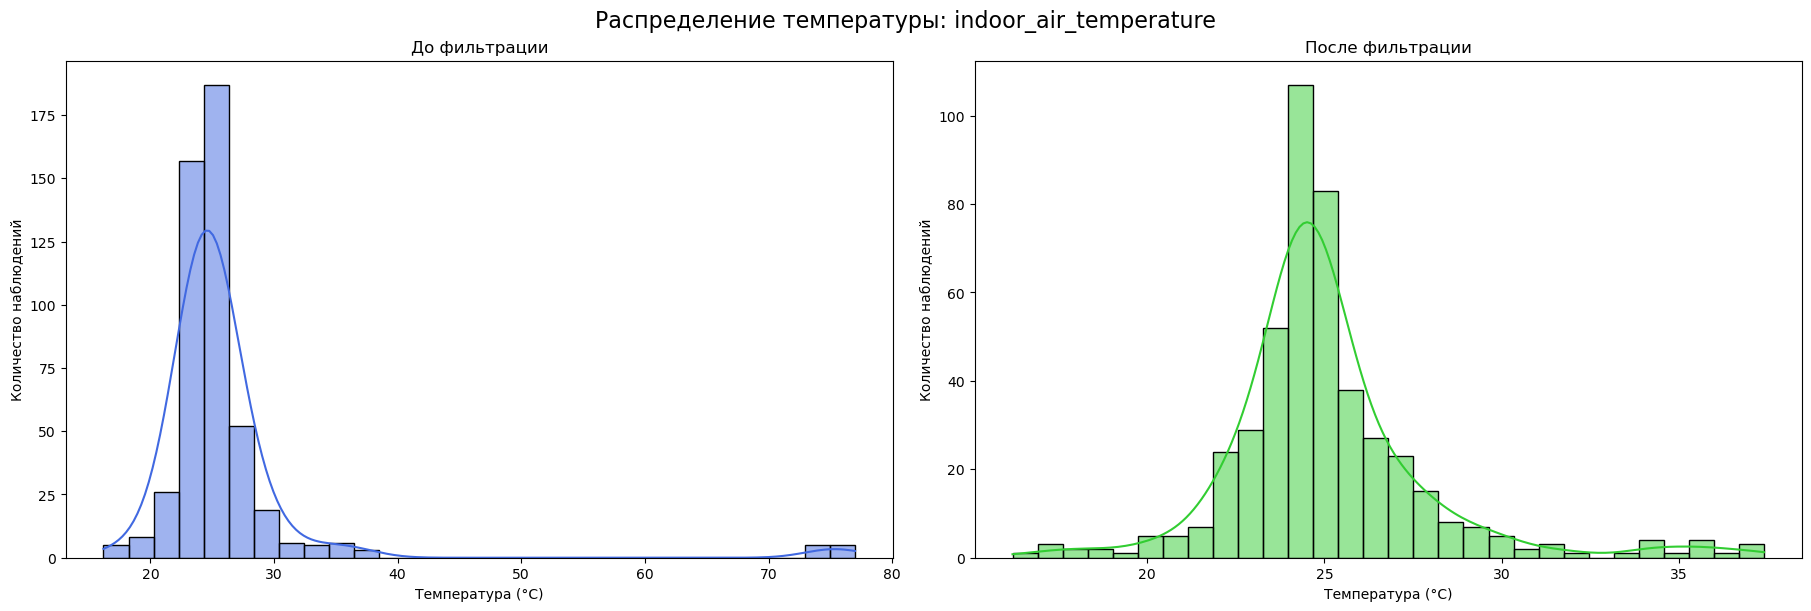


Анализ indoor_air_temperature:
Всего значений (включая пропуски): 484
Не-NaN значений до фильтрации: 484
Не-NaN значений после фильтрации: 464
Удалено значений >40°C: 20
Пропусков в исходных данных: 0


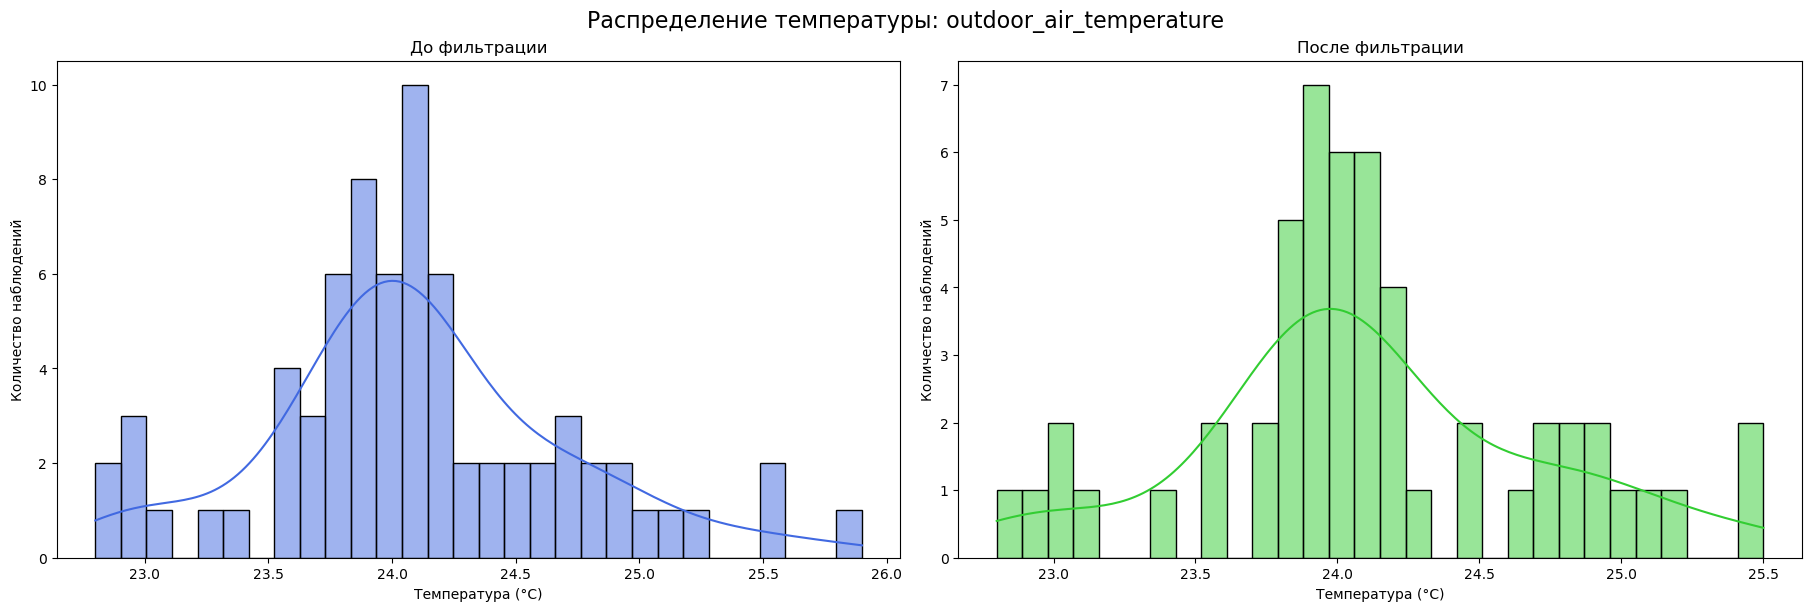


Анализ outdoor_air_temperature:
Всего значений (включая пропуски): 484
Не-NaN значений до фильтрации: 72
Не-NaN значений после фильтрации: 53
Удалено значений >40°C: 19
Пропусков в исходных данных: 412


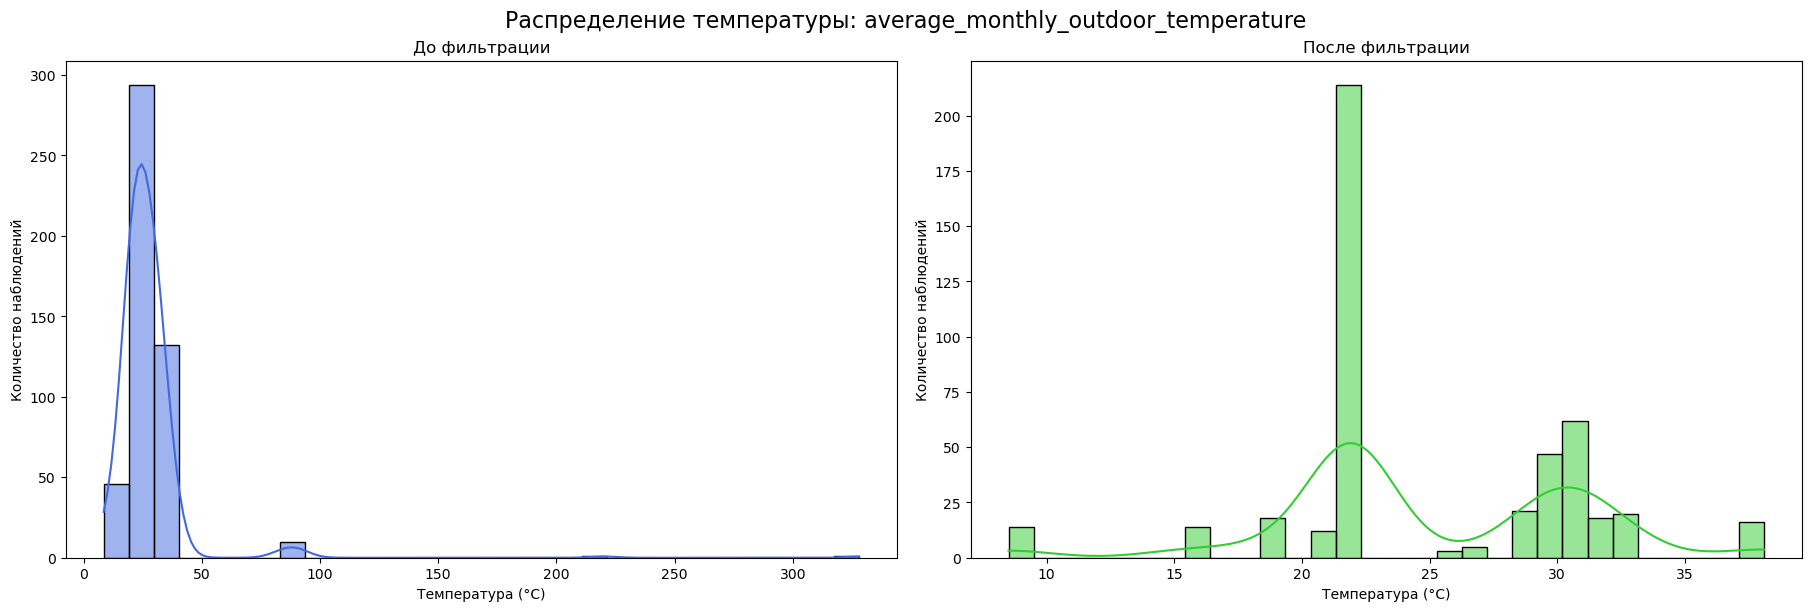


Анализ average_monthly_outdoor_temperature:
Всего значений (включая пропуски): 484
Не-NaN значений до фильтрации: 484
Не-NaN значений после фильтрации: 464
Удалено значений >40°C: 20
Пропусков в исходных данных: 0

Исходный размер датасета: 484 строк
Итоговый размер датасета: 464 строк
Всего удалено строк: 20
Из них из-за значений >40°C: 20


In [21]:
def analyze_and_clean_temperature_data(df, 
                                       indoor_column='indoor_air_temperature',
                                       monthly_outdoor_column='average_monthly_outdoor_temperature',
                                       outdoor_column='outdoor_air_temperature'):
    """
    Анализируем температурные данные с визуализацией до/после фильтрации (>40°C).
    
    """

    df_clean = df.copy()

    print(f"\n{'='*50}")
    print("АНАЛИЗ ТЕМПЕРАТУРНЫХ ДАННЫХ")
    print(f"{'='*50}")

    # Фильтрация
    mask = (
        df_clean[indoor_column].isna() | (df_clean[indoor_column] <= 40)) & (
        df_clean[outdoor_column].isna() | (df_clean[outdoor_column] <= 40)) & (
        df_clean[monthly_outdoor_column].isna() | (df_clean[monthly_outdoor_column] <= 40)
    )
    df_final = df_clean[mask].copy()

    for col in [indoor_column, outdoor_column, monthly_outdoor_column]:
        
        fig, axs = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)
        fig.suptitle(f'Распределение температуры: {col}', fontsize=16)

        # До
        sns.histplot(df_clean[col].dropna(), bins=30, kde=True, color='royalblue', ax=axs[0])
        axs[0].set_title('До фильтрации')
        axs[0].set_xlabel('Температура (°C)')
        axs[0].set_ylabel('Количество наблюдений')

        # После 
        sns.histplot(df_final[col].dropna(), bins=30, kde=True, color='limegreen', ax=axs[1])
        axs[1].set_title('После фильтрации')
        axs[1].set_xlabel('Температура (°C)')
        axs[1].set_ylabel('Количество наблюдений')

        plt.show()

        # Статистика
        initial_non_na = df_clean[col].notna().sum()
        final_non_na = df_final[col].notna().sum()
        removed_high = initial_non_na - final_non_na

        print(f"\nАнализ {col}:")
        print(f"Всего значений (включая пропуски): {len(df_clean)}")
        print(f"Не-NaN значений до фильтрации: {initial_non_na}")
        print(f"Не-NaN значений после фильтрации: {final_non_na}")
        print(f"Удалено значений >40°C: {removed_high}")
        print(f"Пропусков в исходных данных: {df_clean[col].isna().sum()}")

    print(f"\n{'='*50}")
    print(f"Исходный размер датасета: {len(df)} строк")
    print(f"Итоговый размер датасета: {len(df_final)} строк")
    print(f"Всего удалено строк: {len(df) - len(df_final)}")
    print(f"Из них из-за значений >40°C: {len(df_clean) - len(df_final)}")

    return df_final
df_cleaned = analyze_and_clean_temperature_data(df)

Удалили выбросы, которые не могли существовать. Данные стали более однородными, что улучшит анализ. 

#### Колонка "air_speed"

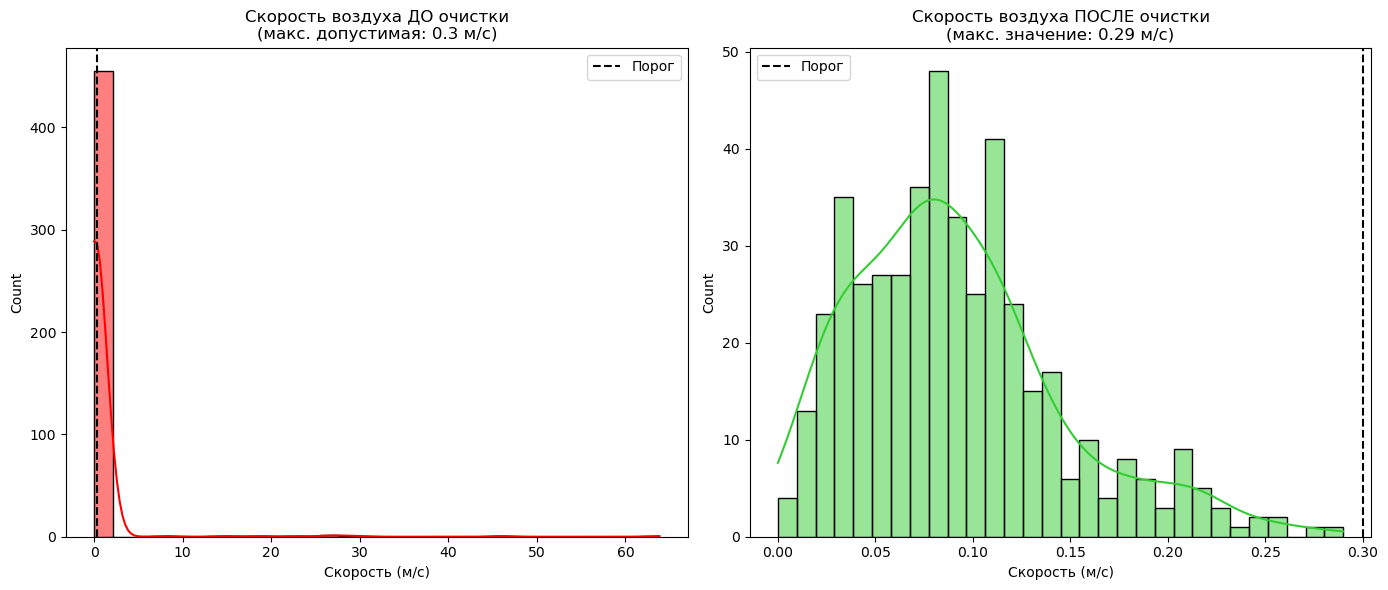


ОБРАБОТКА СКОРОСТИ ВОЗДУХА В ПОМЕЩЕНИИ (макс. 0.3 м/с)

Статистика ДО очистки:
count    464.000000
mean       0.683039
std        4.519847
min        0.000000
25%        0.060000
50%        0.090000
75%        0.140000
max       63.830000
Name: air_speed, dtype: float64

Статистика ПОСЛЕ очистки:
count    455.000000
mean       0.090527
std        0.054349
min        0.000000
25%        0.050000
50%        0.080000
75%        0.120000
max        0.290000
Name: air_speed, dtype: float64

Исправлено значений (0.3–5 м/с → 0.03–0.5): 39
Удалено значений (>5 м/с): -30
Итоговый размер датасета: 455


In [22]:
def clean_indoor_air_speed(df_cleaned, column='air_speed', max_valid_speed=0.3):
    """
    Очищает данные о скорости воздуха В ПОМЕЩЕНИИ:
    - 0.3–5 м/с → делим на 10 (ошибка ввода: 3.5 → 0.35)
    - >5 м/с → удаляем
    - Строит графики и выводит статистику.
    Мы предпологаем, что данный параметр-скорость воздуха в помещении и те, значения, которые находстся вне диапозона-ошибка или неккоректный ввод.
    Параметры:
    max_valid_speed - максимально допустимая скорость (по умолчанию 0.3 м/с,по информации из интернета)
    """
    df_final = df_cleaned.copy()
    before = df_final[column].copy()
    
    #Корректируем 0.3–5 м/с (делим на 10)
    mask_03_5 = (df_final[column] > max_valid_speed) & (df_final[column] <= 5)
    df_final.loc[mask_03_5, column] = df_final.loc[mask_03_5, column] / 10
    
    #Удаляем >5 м/с
    df_final = df_final[df_final[column] <= 5]
    after = df_final[column]
    
    # Визуализация
    plt.figure(figsize=(14, 6))
    
    #До очистки
    plt.subplot(1, 2, 1)
    sns.histplot(before.dropna(), kde=True, color='red', bins=30)
    plt.title(f'Скорость воздуха ДО очистки\n(макс. допустимая: {max_valid_speed} м/с)', fontsize=12)
    plt.xlabel('Скорость (м/с)')
    plt.axvline(max_valid_speed, color='black', linestyle='--', label='Порог')
    plt.legend()
    
    #После очистки
    plt.subplot(1, 2, 2)
    sns.histplot(after.dropna(), kde=True, color='limegreen', bins=30)
    plt.title(f'Скорость воздуха ПОСЛЕ очистки\n(макс. значение: {after.max():.2f} м/с)', fontsize=12)
    plt.xlabel('Скорость (м/с)')
    plt.axvline(max_valid_speed, color='black', linestyle='--', label='Порог')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"\n{'='*50}")
    print(f"ОБРАБОТКА СКОРОСТИ ВОЗДУХА В ПОМЕЩЕНИИ (макс. {max_valid_speed} м/с)")
    print(f"{'='*50}")
    
    print("\nСтатистика ДО очистки:")
    print(before.describe())
    
    print("\nСтатистика ПОСЛЕ очистки:")
    print(after.describe())
    
    print(f"\nИсправлено значений (0.3–5 м/с → 0.03–0.5): {mask_03_5.sum()}")
    print(f"Удалено значений (>5 м/с): {len(before) - len(after) - mask_03_5.sum()}")
    print(f"Итоговый размер датасета: {len(df_final)}")
    
    return df_final


df_final = clean_indoor_air_speed(df_cleaned, max_valid_speed=0.3)

#### Колонка "height"

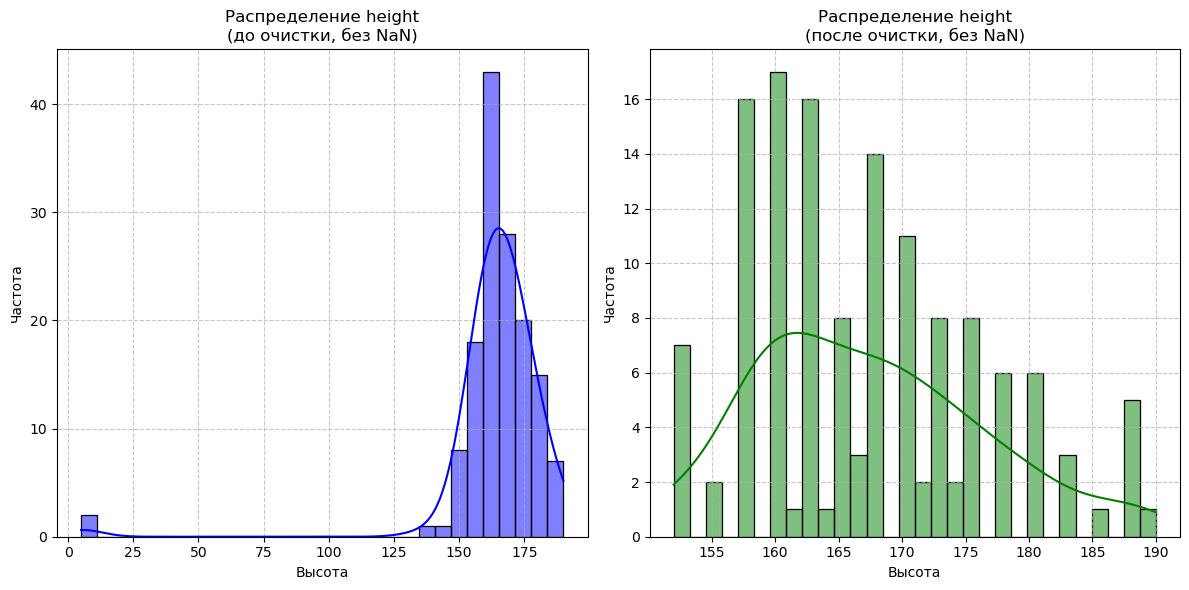


Анализ для height:
Статистика до очистки (включая NaN):
count         143.0
mean     164.503497
std       21.251967
min             5.0
25%           160.0
50%           165.0
75%           173.0
max           190.0
Name: height, dtype: Float64

Количество NaN: 312

Статистика после очистки (включая NaN):
count         138.0
mean     167.289855
std        8.936273
min           152.0
25%           160.0
50%           167.0
75%           173.0
max           190.0
Name: height, dtype: Float64

Количество NaN: 312

Удалено строк (где height < 150): 5

Итоговый размер датасета: 450
Всего удалено строк (height < 150): 5


In [23]:
def analyze_and_clean_height_data(df_final, height_column='height'):
    """
    Удаляем строки, где height < 100, которые не могло быть.
    
    """
    
    
    df_clean = df_final.copy()
    
    
    height_before = df_clean[height_column]
    
    
    mask = (df_clean[height_column] >= 150) | (df_clean[height_column].isna())
    df_final_cleaned = df_clean[mask].copy()
    height_after = df_final_cleaned[height_column]
    
    
    plt.figure(figsize=(12, 6))
    
    # График до очистки 
    plt.subplot(1, 2, 1)
    sns.histplot(height_before.dropna(), kde=True, color='blue', bins=30)
    plt.title(f'Распределение {height_column}\n(до очистки, без NaN)')
    plt.xlabel('Высота')
    plt.ylabel('Частота')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # График после очистки 
    plt.subplot(1, 2, 2)
    sns.histplot(height_after.dropna(), kde=True, color='green', bins=30)
    plt.title(f'Распределение {height_column}\n(после очистки, без NaN)')
    plt.xlabel('Высота')
    plt.ylabel('Частота')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Вывод статистики 
    print(f"\n{'='*50}")
    print(f"Анализ для {height_column}:")
    print("Статистика до очистки (включая NaN):")
    print(height_before.describe())
    print(f"\nКоличество NaN: {height_before.isna().sum()}")
    
    print("\nСтатистика после очистки (включая NaN):")
    print(height_after.describe())
    print(f"\nКоличество NaN: {height_after.isna().sum()}")
    
    print(f"\nУдалено строк (где height < 150): {len(df_clean) - len(df_final_cleaned)}")
    
    print(f"\n{'='*50}")
    print(f"Итоговый размер датасета: {len(df_final_cleaned)}")
    print(f"Всего удалено строк (height < 150): {len(df_clean) - len(df_final_cleaned)}")
    
    return df_final_cleaned


df_final_cleaned = analyze_and_clean_height_data(df_final)

# Проверить данные на пропуски и заполнить их при необходимости. Обосновать решение.

Проверяем наш DF на попуски

In [24]:
print("\nПропущенные значения:")
print(df_final_cleaned.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                     71
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              253
preferred_air_movement_change            0
comfort_rating                         268
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                406
relative_humidity                        0
air_speed                                0
height                                 312
weight                         

## Колонка "возраст"

Рассмотрим столбец "возраст", чтобы определеить, чем заполнить пропуски


Анализ столбца age:
count        379.0
mean      40.91029
std      11.122805
min           22.0
25%           35.0
50%           45.0
75%           45.0
max           65.0
Name: age, dtype: Float64
Количество пропусков: 71


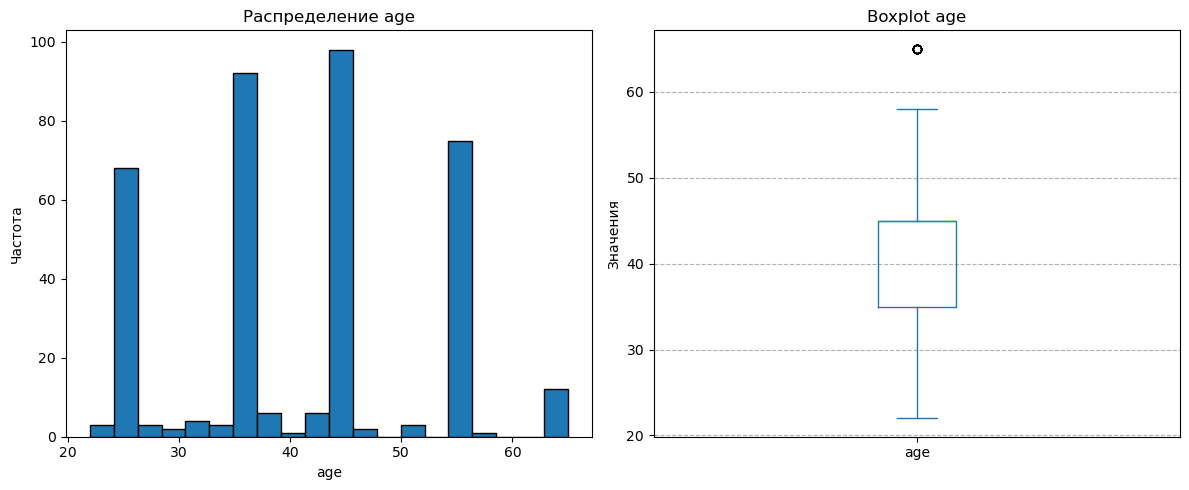


Заполняем пропуски медианой: 45.0

Результат после заполнения:
Осталось пропусков: 0
Уникальные значения: <IntegerArray>
[22, 42, 27, 32, 43, 26, 31, 38, 34, 36, 28, 29, 39, 35, 46, 40, 50, 25, 51,
 58, 23, 55, 45, 65]
Length: 24, dtype: Int64


In [25]:
def fill_na_with_median(df, column_name):
    """
    Анализируем распределение данных в столбце и заполняет пропуски медианой.
    
    
    """
    
    # Cnfnbcnbrf
    print(f"\nАнализ столбца {column_name}:")
    print(df[column_name].describe())
    print("Количество пропусков:", df[column_name].isna().sum())
    
    # Визуализация 
    plt.figure(figsize=(12, 5))
    
    
    plt.subplot(1, 2, 1)
    df[column_name].plot.hist(bins=20, edgecolor='black')
    plt.title(f'Распределение {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    
    
    plt.subplot(1, 2, 2)
    df[column_name].plot.box()
    plt.title(f'Boxplot {column_name}')
    plt.ylabel('Значения')
    plt.grid(axis='y', linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Заполняем пропуски медианой
    median_value = df[column_name].median()
    print(f"\nЗаполняем пропуски медианой: {median_value}")
    df[column_name].fillna(median_value, inplace=True)
    
    #Результат
    print("\nРезультат после заполнения:")
    print("Осталось пропусков:", df[column_name].isna().sum())
    print("Уникальные значения:", df[column_name].unique())
fill_na_with_median(df_final_cleaned, 'age')

По гистограмме видно, что распределение возраста **не является симметричным**, поэтому медиана лучше отражает типичное значение, чем среднее. Boxplot подтверждает, что большинство данных сосредоточено в диапазоне **30–45 лет**, где и находится медиана. Заполнение пропусков медианой **минимизирует искажения**, так как она устойчива к редким выбросам вроде возрастов выше 60 лет. Этот подход сохраняет естественную структуру данных без смещения в сторону крайних значений.

Проверка, в каких колонках еще не заполнены пропуски

In [26]:
print("\nПропущенные значения:")
print(df_final_cleaned.isnull().sum())


Пропущенные значения:
year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              253
preferred_air_movement_change            0
comfort_rating                         268
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                406
relative_humidity                        0
air_speed                                0
height                                 312
weight                         

## Провести аналитический и графический анализ данных. Сделать выводы.

### Анализ распределения основных переменных

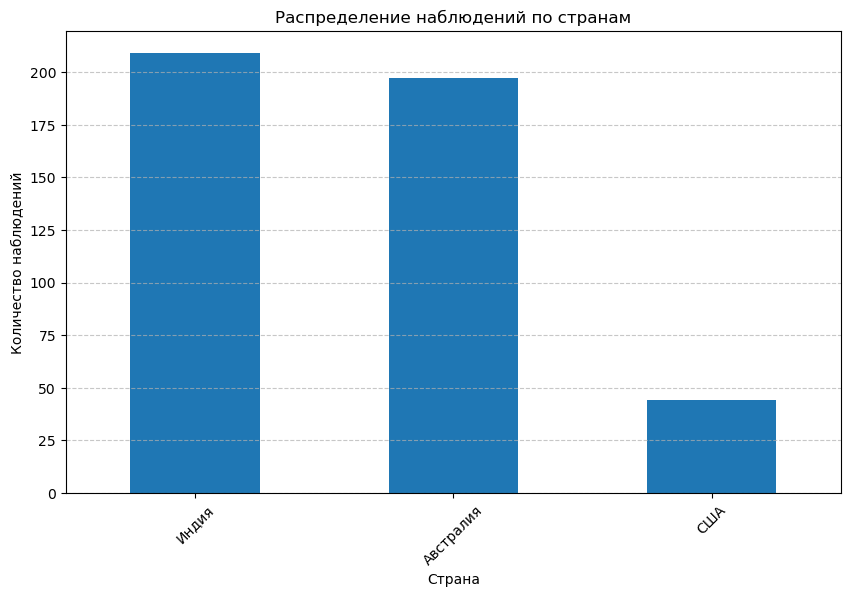

In [27]:
# Распределение по странам
country_counts = df_final_cleaned['country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Распределение наблюдений по странам')
plt.xlabel('Страна')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наибольшее количество наблюдений из Австралии (около 200), затем Индия (около 150) и США (около 50).

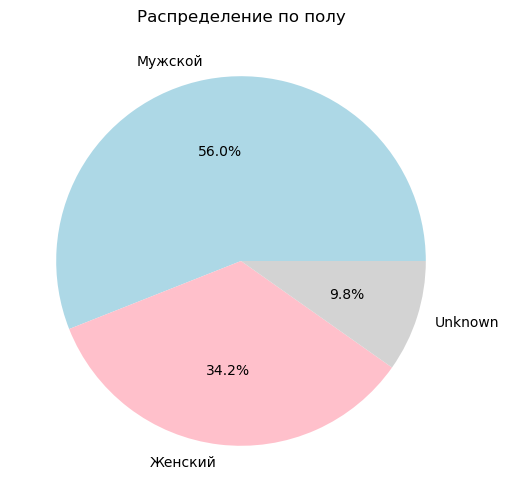

In [28]:
# Распределение по полу
gender_counts = df_final_cleaned['gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'lightgray'])
plt.title('Распределение по полу')
plt.ylabel('')
plt.show()

Вывод: В данных преобладают мужчины (около 55%), женщины составляют около 34%, и около 10% данных без указания пола.

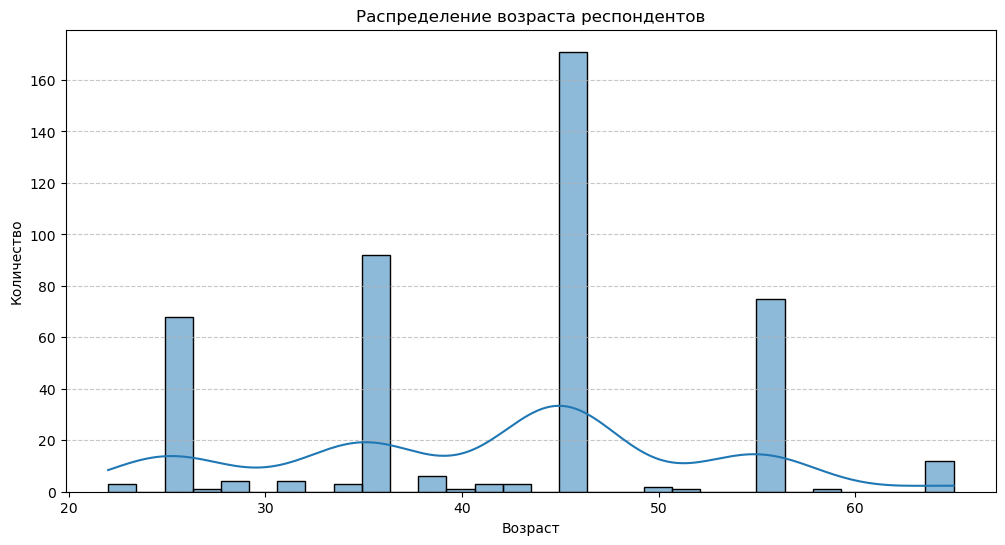

In [29]:
# Распределение по возрасту
plt.figure(figsize=(12, 6))
sns.histplot(df_final_cleaned['age'], bins=30, kde=True)
plt.title('Распределение возраста респондентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Возрастное распределение показывает, что большинство респондентов в возрасте от 25 до 55 лет, с пиком около 35-45 лет.

### Анализ температурных значений

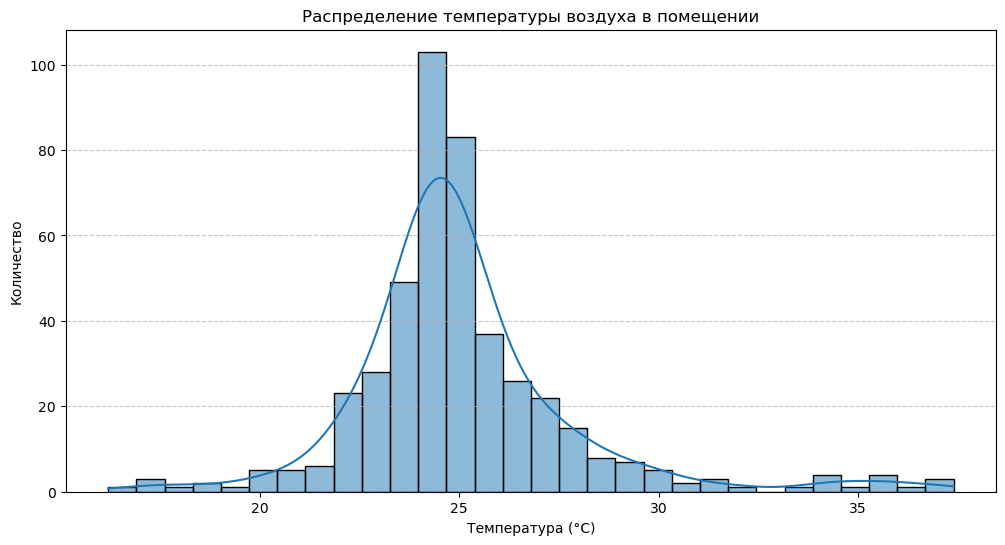

In [30]:
# Распределение температуры в помещении
plt.figure(figsize=(12, 6))
sns.histplot(df_final_cleaned['indoor_air_temperature'], bins=30, kde=True)
plt.title('Распределение температуры воздуха в помещении')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Температура в помещении варьируется от 21°C до 29°C, с основным диапазоном 22-26°C. 

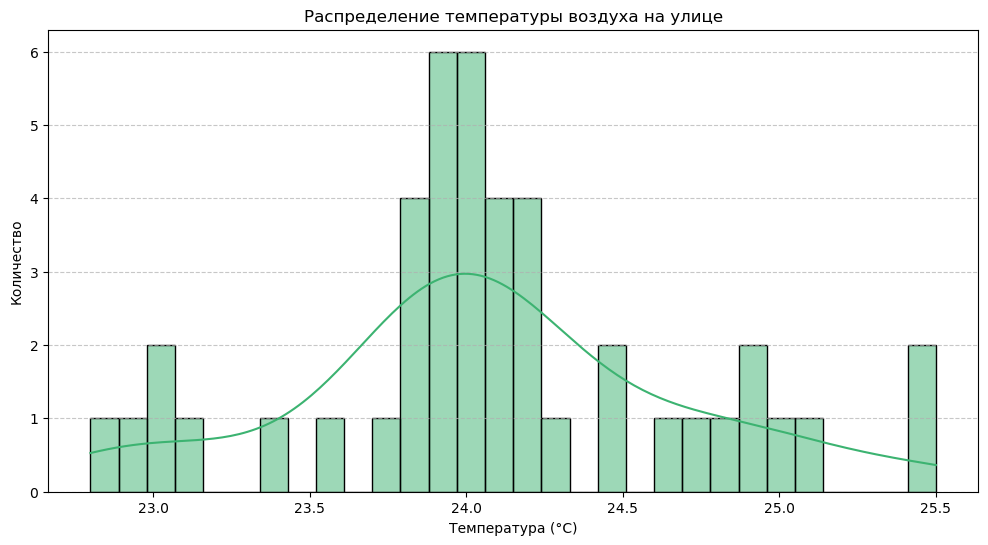

In [31]:
# Распределение температуры на улице 
outdoor_temp = df_final_cleaned[df_final_cleaned['outdoor_air_temperature'].notna()]['outdoor_air_temperature']
plt.figure(figsize=(12, 6))
sns.histplot(outdoor_temp, bins=30, kde=True, color='mediumseagreen')
plt.title('Распределение температуры воздуха на улице')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Уличная температура варьируется от 23°C до 26°C, что отражает разные климатические условия в местах сбора данных.

## Анализ субъективных оценок

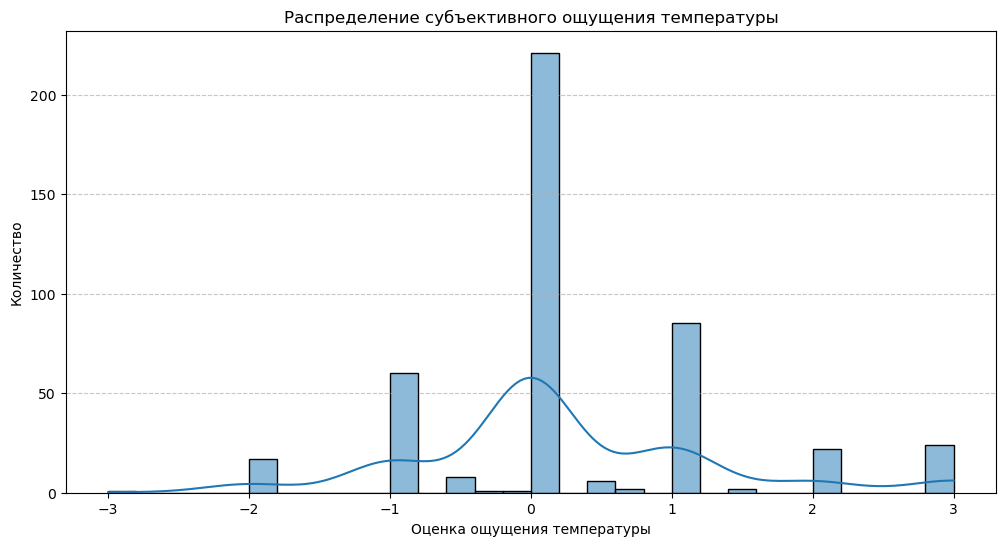

In [32]:
# Распределение ощущения температуры
plt.figure(figsize=(12, 6))
sns.histplot(df_final_cleaned['temperature_feeling'], bins=30, kde=True)
plt.title('Распределение субъективного ощущения температуры')
plt.xlabel('Оценка ощущения температуры')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Ощущение температуры варьируется от -2 (слишком холодно) до +3 (слишком жарко), с пиком около 0 (нейтральное ощущение).

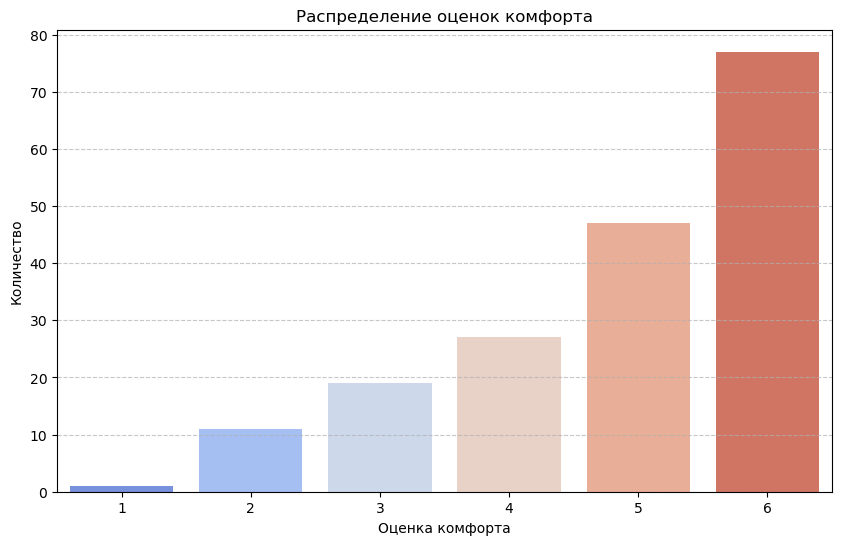

In [33]:

# Распределение оценки комфорта
plt.figure(figsize=(10, 6))
sns.countplot(x='comfort_rating', data=df_final_cleaned, palette='coolwarm')
plt.title('Распределение оценок комфорта')
plt.xlabel('Оценка комфорта')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наиболее частые оценки комфорта - 6, остальные-по убыванию

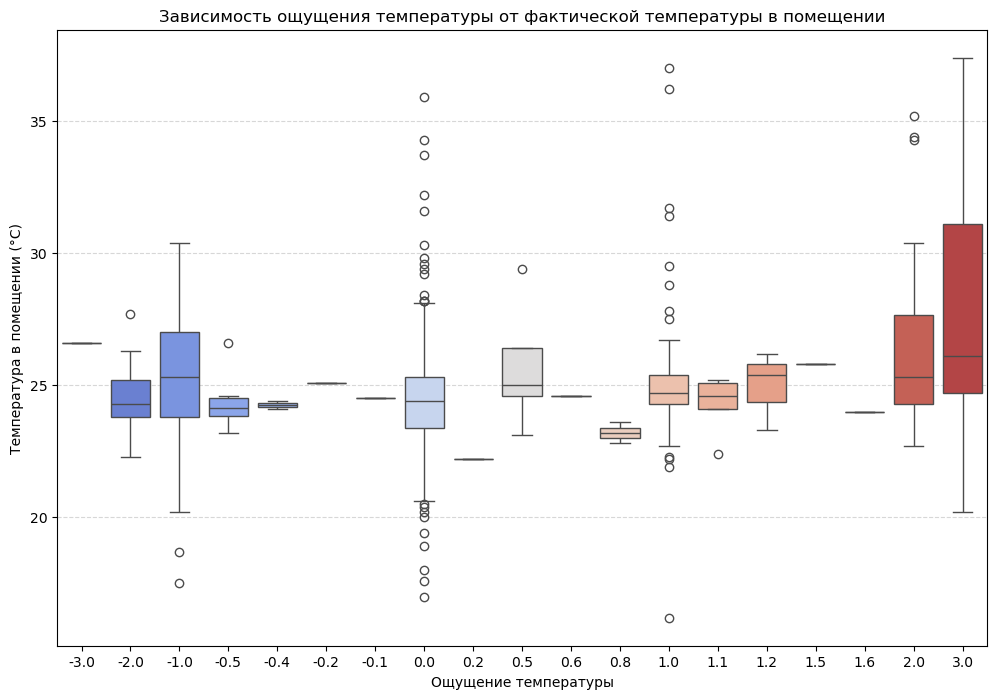

In [34]:
# Связь температуры в помещении и ощущения температуры
plt.figure(figsize=(12, 8))
sns.boxplot(x='temperature_feeling', y='indoor_air_temperature',
            data=df_final_cleaned, palette='coolwarm')
plt.title('Зависимость ощущения температуры от фактической температуры в помещении')
plt.xlabel('Ощущение температуры')
plt.ylabel('Температура в помещении (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### Анализ по климатическим зонам

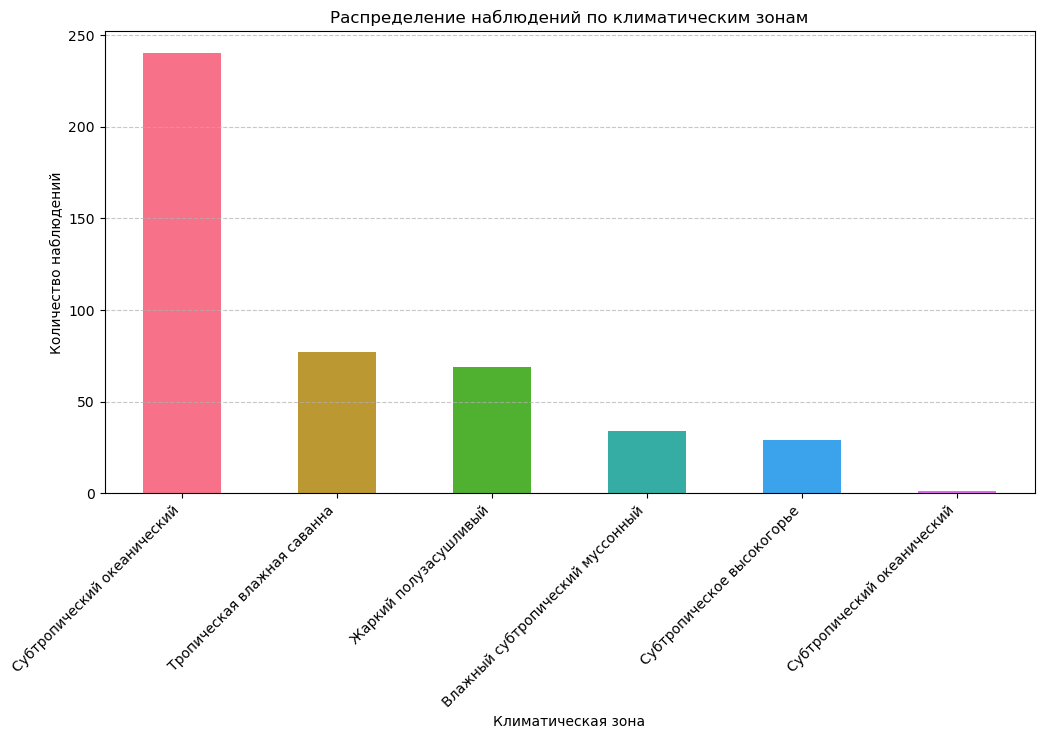

In [35]:
# Распределение по климатическим зонам
plt.figure(figsize=(12, 6))
df_final_cleaned['climate'].value_counts().plot(kind='bar', color=sns.color_palette('husl'))
plt.title('Распределение наблюдений по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Количество наблюдений')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наибольшин кол-вом представлены субтропический океанический и тропическая влажная саванна.

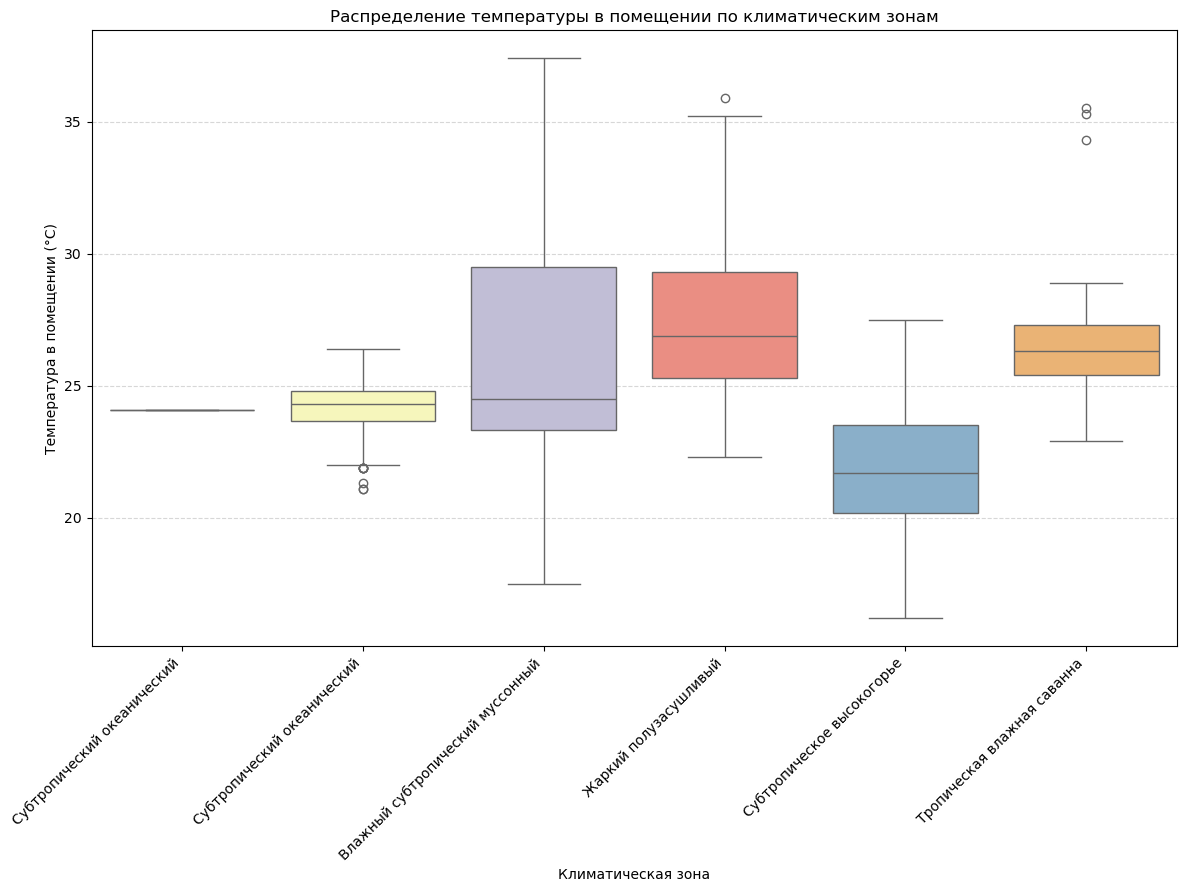

In [36]:
# Температура в помещении по климатическим зонам
plt.figure(figsize=(14, 8))
sns.boxplot(x='climate', y='indoor_air_temperature',
            data=df_final_cleaned, palette='Set3')
plt.title('Распределение температуры в помещении по климатическим зонам')
plt.xlabel('Климатическая зона')
plt.ylabel('Температура в помещении (°C)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Вывод: Наибольшие температуры в помещении наблюдаются в жарком полузасушливом климате, самые низкие - в субтропическом высокогорье.

### Анализ систем кондиционирования и отопления

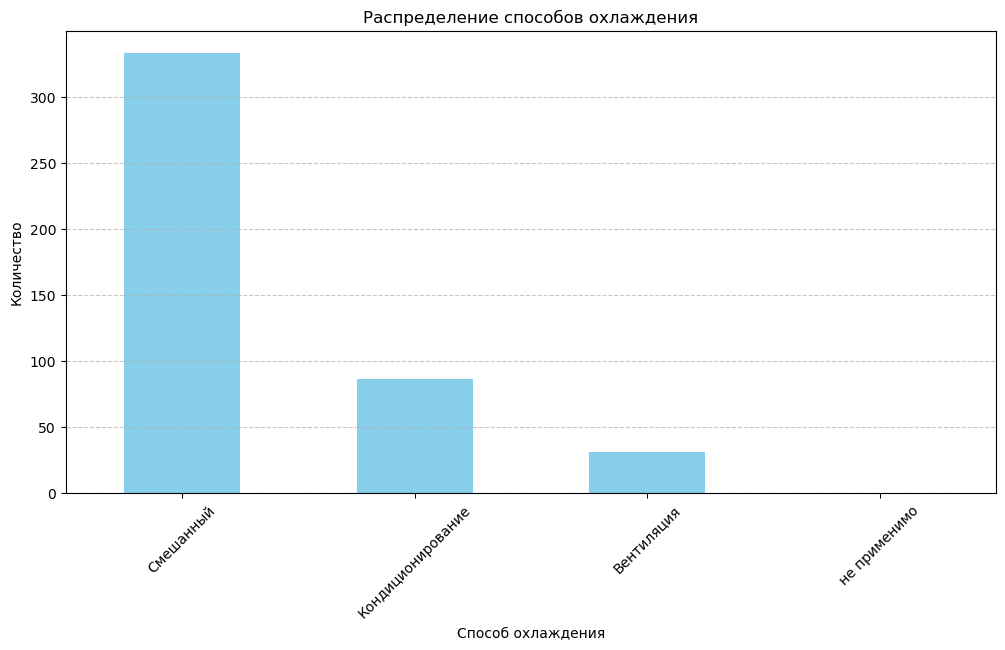

In [37]:
# Используемые способы охлаждения
plt.figure(figsize=(12, 6))
df_final_cleaned['cooling_method'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Распределение способов охлаждения')
plt.xlabel('Способ охлаждения')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Наиболее распространены смешанные системы и кондиционирование, вентиляция используется реже.

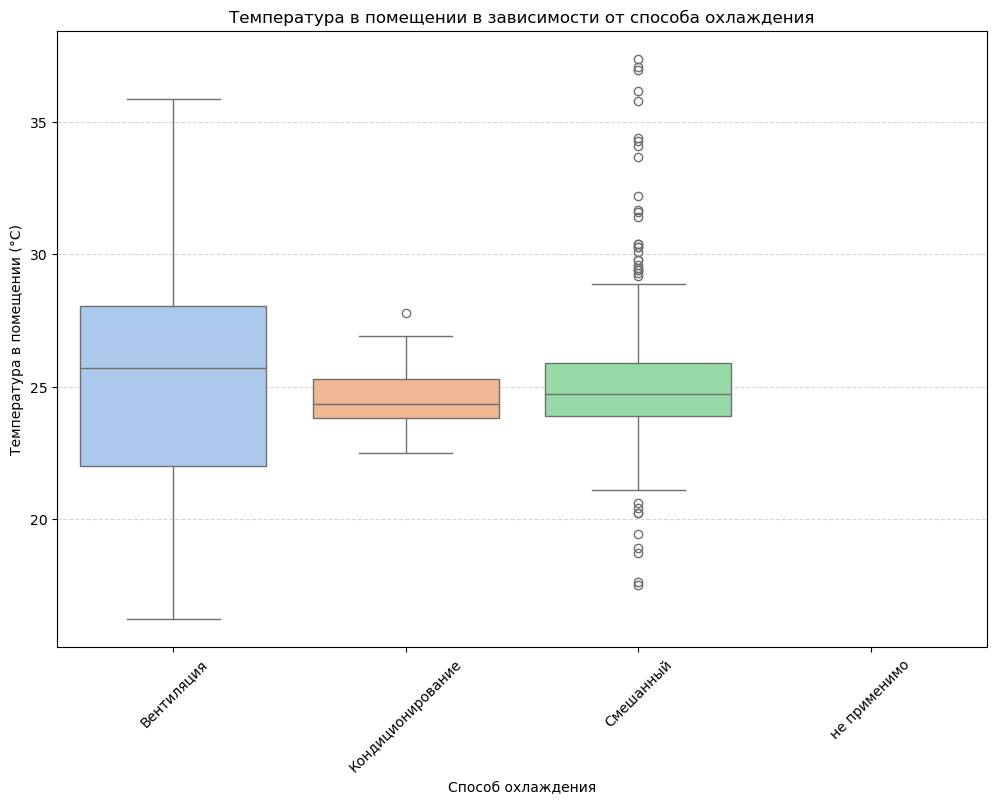

In [38]:
# Связь способа охлаждения с температурой в помещении
plt.figure(figsize=(12, 8))
sns.boxplot(x='cooling_method', y='indoor_air_temperature',
            data=df_final_cleaned, palette='pastel')
plt.title('Температура в помещении в зависимости от способа охлаждения')
plt.xlabel('Способ охлаждения')
plt.ylabel('Температура в помещении (°C)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Вывод: При использовании кондиционирования температура в помещении в среднем ниже, чем при вентиляции или смешанных системах.

### Многомерный анализ

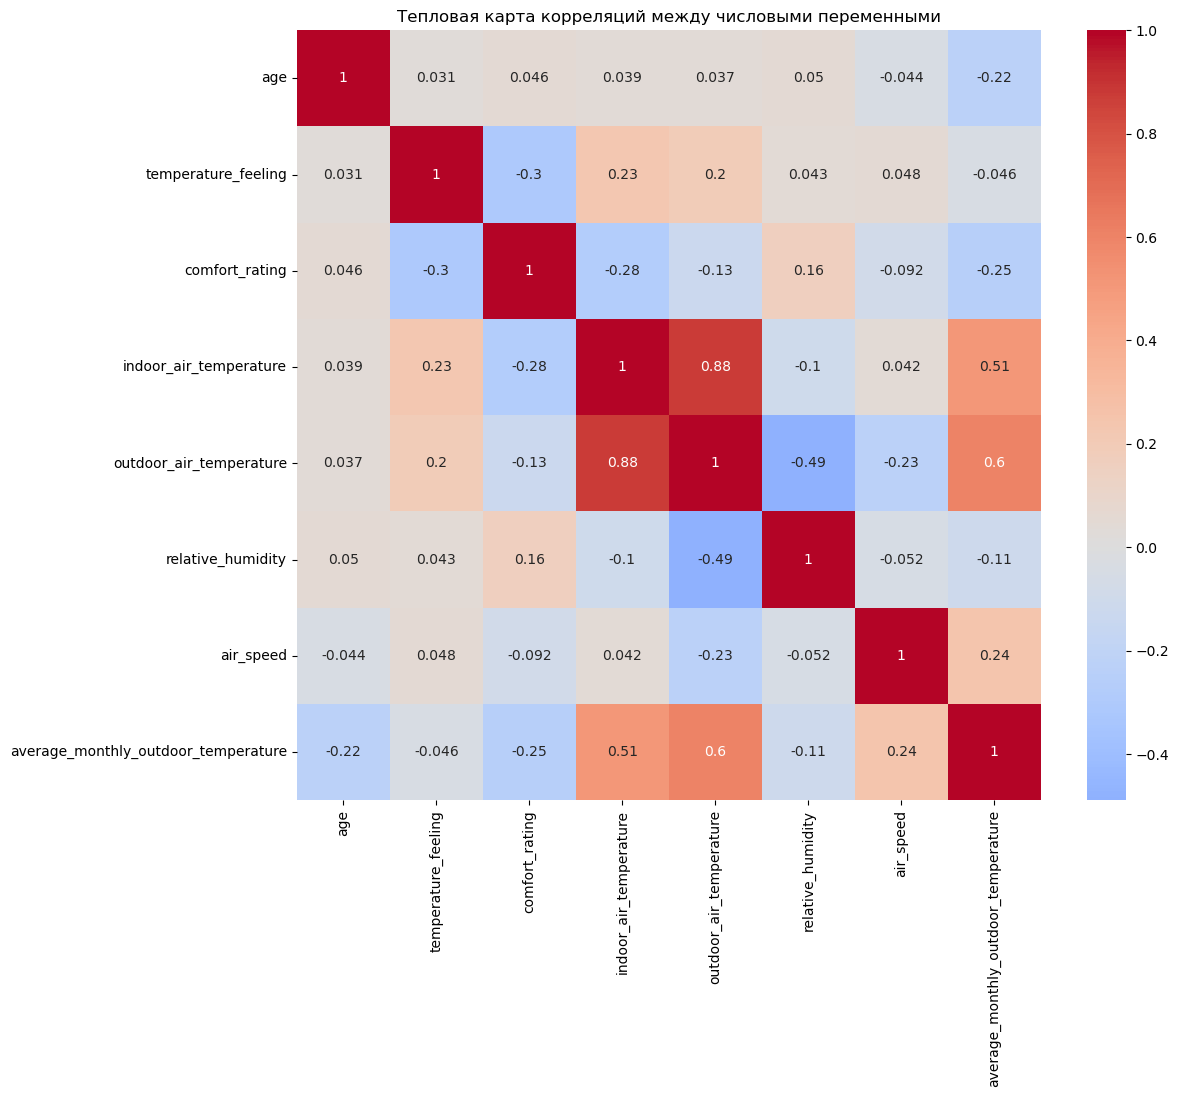

In [39]:
# Выбор числовых переменных для корреляционного анализа
numeric_cols = [
    'age',  # Возраст
    'temperature_feeling',  # Ощущение температуры
    'comfort_rating',  # Оценка комфорта
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'average_monthly_outdoor_temperature'  # Среднемесячная температура на улице
]

# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(df_final_cleaned[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций между числовыми переменными')
plt.show()

Вывод: Наибольшая корреляция наблюдается между:

температурой в помещении и на улице

температурой в помещении и ощущением температуры

температурой на улице и средней месячной температурой

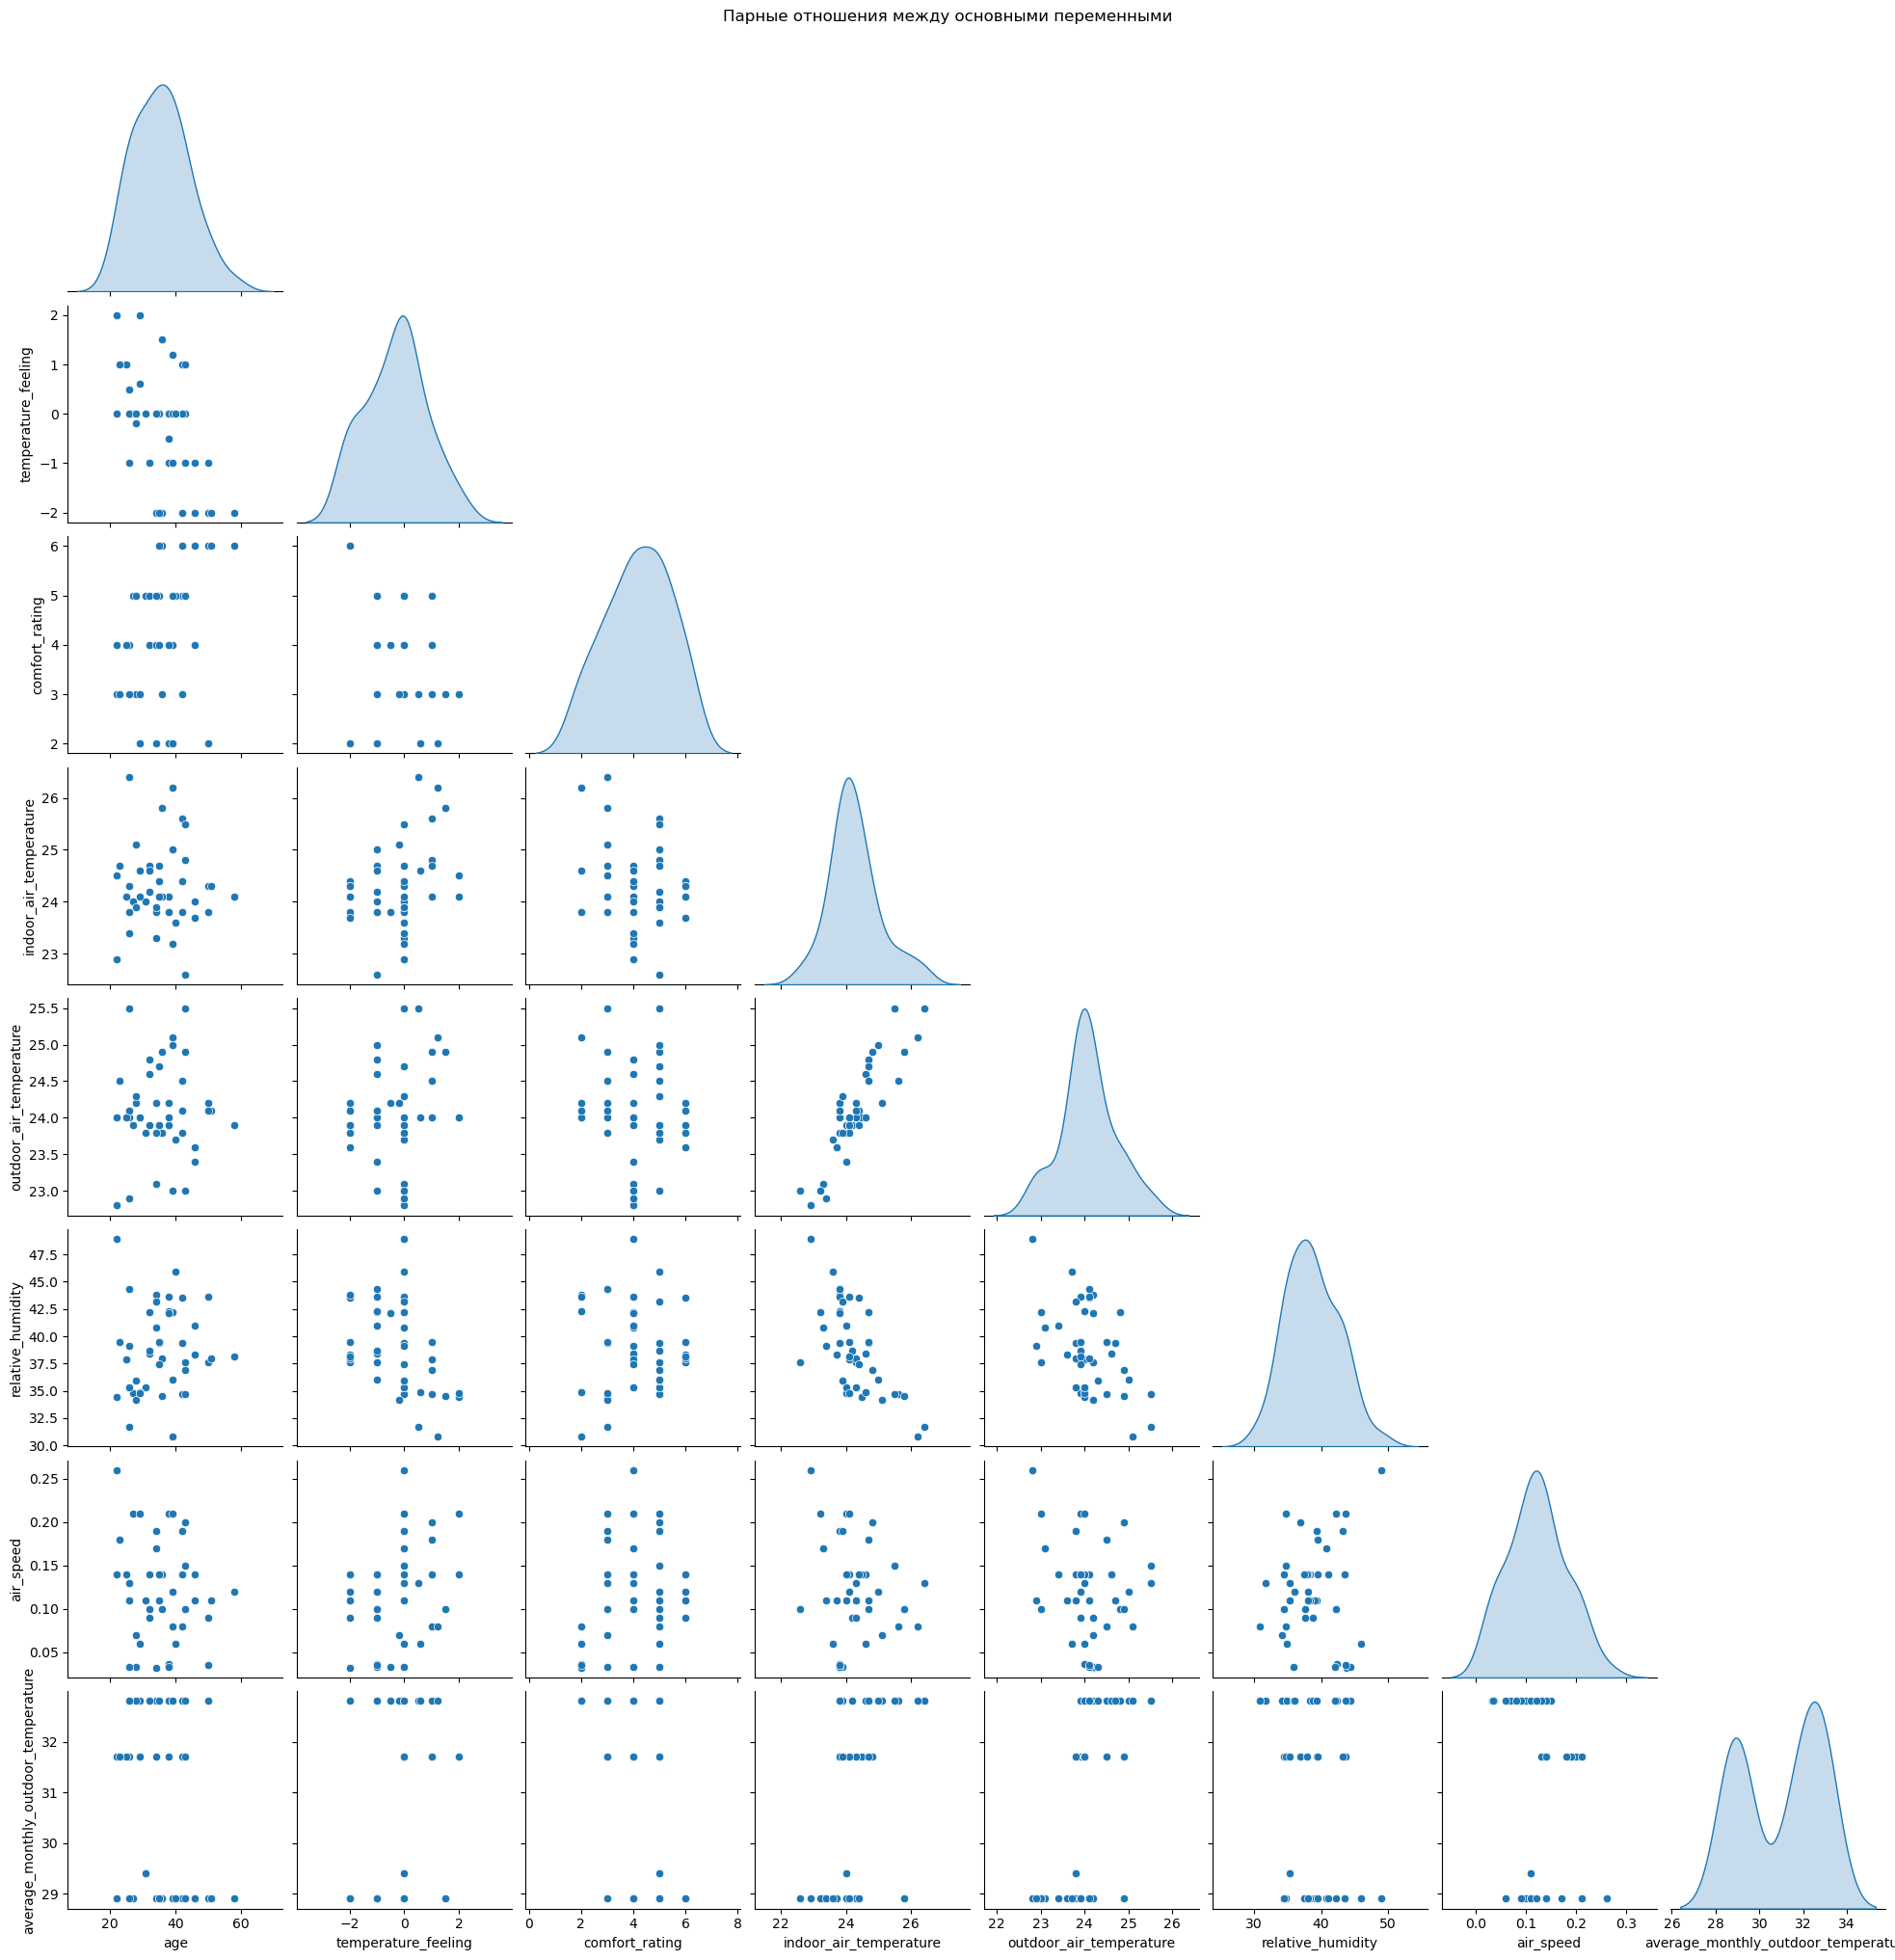

In [40]:
# Pairplot для основных переменных
sns.pairplot(df_final_cleaned[numeric_cols].dropna(), corner=True, diag_kind='kde')
plt.suptitle('Парные отношения между основными переменными', y=1.02)
plt.show()

Вывод: Визуализация подтверждает выявленные ранее закономерности и показывает распределения и взаимосвязи между переменными.

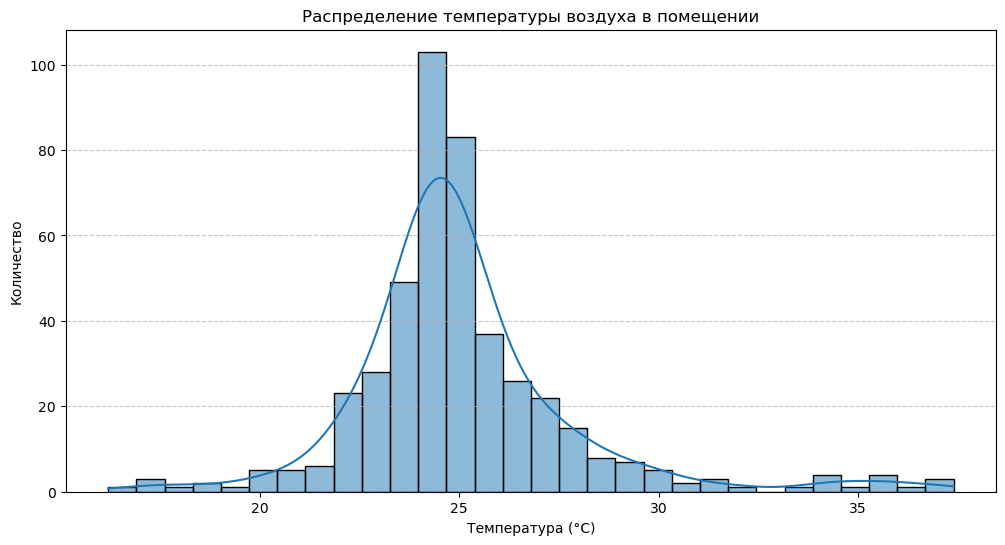

In [41]:
# Распределение температуры в помещении
plt.figure(figsize=(12, 6))
sns.histplot(df_final_cleaned['indoor_air_temperature'], bins=30, kde=True)
plt.title('Распределение температуры воздуха в помещении')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Вывод: Температура в помещении варьируется от 21°C до 29°C, с основным диапазоном 22-26°C. 

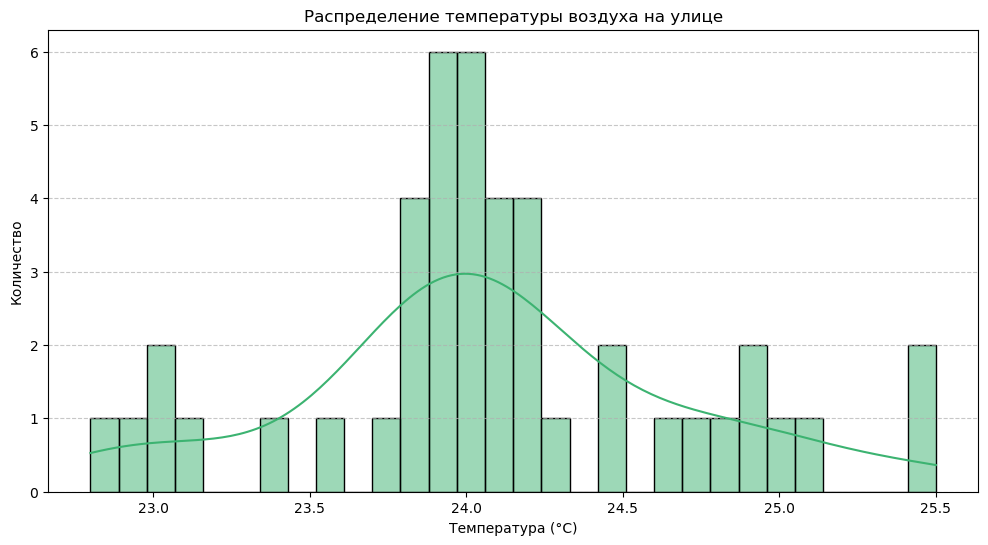

In [42]:
# Распределение температуры на улице 
outdoor_temp = df_final_cleaned[df_final_cleaned['outdoor_air_temperature'].notna()]['outdoor_air_temperature']
plt.figure(figsize=(12, 6))
sns.histplot(outdoor_temp, bins=30, kde=True, color='mediumseagreen')
plt.title('Распределение температуры воздуха на улице')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
df_final_cleaned.to_csv("data/cleared_data.csv", index=False)

Вывод: Уличная температура варьируется от 23°C до 26°C, что отражает разные климатические условия в местах сбора данных.

# Проведение расчётов и исследований

### Базовая подготовка датасета к проведению рассчетов

In [44]:
column_names = [
    'year',  # Год
    'season',  # Время года
    'climate',  # Климат
    'city',  # Город
    'country',  # Страна
    'cooling_method',  # Способ охлаждения
    'mixed_cooling_mode',  # Режим при смешанном типе охлаждения
    'heating_method',  # Способ обогрева
    'age',  # Возраст
    'gender',  # Пол
    'temperature_feeling',  # Ощущение температуры
    'temperature_feeling_bool',  # Ощущение температуры (bool)
    'preferred_temperature_change',  # Предпочтительное изменение температуры
    'air_movement_feeling_bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change',  # Предпочтительное изменение движения воздуха
    'comfort_rating',  # Оценка комфорта
    'clothing_insulation',  # Утепление
    'indoor_air_temperature',  # Температура воздуха в помещении
    'outdoor_air_temperature',  # Температура воздуха на улице
    'relative_humidity',  # Относительная влажность (RH)
    'air_speed',  # Скорость воздуха
    'height',  # Рост
    'weight',  # Вес
    'curtains',  # Занавески
    'fan_mode',  # Вентилятор
    'window_status',  # Окно
    'door_status',  # Двери
    'heating_mode',  # Отопление
    'average_monthly_outdoor_temperature',  # Среднемесячная температура на улице
    'number_of_complaints'  # Количество рекламаций
]

column_types = {
    'year': 'int',  # Год (целое число)
    'season': 'category',  # Время года (категориальная переменная: весна, лето и т.д.)
    'climate': 'category',  # Климат (категориальная переменная: названия типов климата)
    'city': 'category',  # Город (категориальная переменная)
    'country': 'category',  # Страна (категориальная переменная)
    'cooling_method': 'category',  # Способ охлаждения (категориальная переменная)
    'mixed_cooling_mode': 'category',  # Режим при смешанном типе охлаждения (категориальная переменная)
    'heating_method': 'category',  # Способ обогрева (категориальная переменная)
    'age': 'int',  # Возраст (целое число)
    'gender': 'category',  # Пол (категориальная переменная: мужской/женский)
    'temperature_feeling': 'float',  # Ощущение температуры (целое число от -3 до +3)
    'temperature_feeling_bool': 'bool',  # Ощущение температуры (bool)
    'preferred_temperature_change': 'category',  # Предпочтительное изменение температуры (категориальная переменная)
    'air_movement_feeling_bool': 'bool',  # Ощущение движения воздуха (bool)
    'preferred_air_movement_change': 'category',  # Предпочтительное изменение движения воздуха (категориальная переменная)
    'comfort_rating': 'int',  # Оценка комфорта (целое число от 1 до 6)
    'clothing_insulation': 'category',  # Утепление (вещественное число, связанный с одеждой фактор)
    'indoor_air_temperature': 'float',  # Температура воздуха в помещении (вещественное число)
    'outdoor_air_temperature': 'float',  # Температура воздуха на улице (вещественное число)
    'relative_humidity': 'float',  # Относительная влажность (вещественное число)
    'air_speed': 'float',  # Скорость воздуха (вещественное число)
    'height': 'float',  # Рост (вещественное число)
    'weight': 'float',  # Вес (вещественное число)
    'curtains': 'bool',  # Занавески (категориальная переменная: 0 или 1)
    'fan_mode': 'bool',  # Вентилятор (категориальная переменная: 0 или 1)
    'window_status': 'bool',  # Окно (категориальная переменная: 0 или 1)
    'door_status': 'bool',  # Двери (категориальная переменная: 0 или 1)
    'heating_mode': 'bool',  # Отопление (категориальная переменная: 0 или 1)
    'average_monthly_outdoor_temperature': 'float',  # Среднемесячная температура на улице (вещественное число)
    'number_of_complaints': 'int'  # Количество рекламаций (целое число)
}

In [45]:
df = pd.read_csv(
    'data/cleared_data.csv',
    # sep=';',
    # decimal='.',
    # header=0,
    # names=column_names
)

df.head()


,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,temperature_feeling,temperature_feeling_bool,preferred_temperature_change,air_movement_feeling_bool,preferred_air_movement_change,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,22,Unknown,0.0,приемлемо,Без изменений,NaN,Без изменений,4.0,среднее,22.9,22.8,48.9,0.26,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,1.0,приемлемо,Без изменений,NaN,Без изменений,5.0,среднее,25.6,24.5,34.7,0.08,NaN,NaN,открыто,выключен,нет данных,нет данных,нет данных,32.8,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,0.0,приемлемо,Без изменений,NaN,Без изменений,5.0,среднее,24.0,23.9,34.8,0.21,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,28.9,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,-1.0,приемлемо,Теплее,NaN,Меньше,4.0,среднее,24.7,24.8,42.2,0.10,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,32.8,0
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,Unknown,0.0,приемлемо,Без изменений,NaN,Без изменений,5.0,среднее,25.5,25.5,34.7,0.15,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,32.8,0


In [46]:
df.shape

(450, 30)

In [47]:
df.isna().sum()

year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              253
preferred_air_movement_change            0
comfort_rating                         268
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                406
relative_humidity                        0
air_speed                                0
height                                 312
weight                                 241
curtains   

In [48]:
df.dtypes

year                                     int64
season                                  object
climate                                 object
city                                    object
country                                 object
cooling_method                          object
mixed_cooling_mode                      object
heating_method                          object
age                                      int64
gender                                  object
temperature_feeling                    float64
temperature_feeling_bool                object
preferred_temperature_change            object
air_movement_feeling_bool               object
preferred_air_movement_change           object
comfort_rating                         float64
clothing_insulation                     object
indoor_air_temperature                 float64
outdoor_air_temperature                float64
relative_humidity                      float64
air_speed                              float64
height       

In [49]:
# df = pd.read_csv(
#     'data/data.csv',
#     sep=';',
#     decimal='.',
#     header=0,
#     names=column_names
# )

# df.to_csv('data/norm_data.csv', index=False)
df = df.astype(column_types, errors='ignore')
# df = df.drop(['height', 'weight'], axis=1)

# df['cooling_method'].fillna("NA")
# df['mixed_cooling_mode'].fillna("NA")
# df['heating_method'].fillna("NA")

# df['comfort_rating'].fillna(3)

# for column in df.columns:
#     mode_value = df[column].mode()[0] if not df[column].mode().empty else None
#     df[column] = df[column].fillna(mode_value)

# df = df.astype(column_types, errors='ignore')

# df = df.drop_duplicates(keep='first')

# df.head()

In [50]:
df.dtypes

year                                      int64
season                                 category
climate                                category
city                                   category
country                                category
cooling_method                         category
mixed_cooling_mode                     category
heating_method                         category
age                                       int64
gender                                 category
temperature_feeling                     float64
temperature_feeling_bool                   bool
preferred_temperature_change           category
air_movement_feeling_bool                  bool
preferred_air_movement_change          category
comfort_rating                          float64
clothing_insulation                    category
indoor_air_temperature                  float64
outdoor_air_temperature                 float64
relative_humidity                       float64
air_speed                               

### Рассчеты

In [51]:
df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,temperature_feeling,temperature_feeling_bool,preferred_temperature_change,air_movement_feeling_bool,preferred_air_movement_change,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,22,Unknown,0.0,True,Без изменений,True,Без изменений,4.0,среднее,22.9,22.8,48.9,0.26,NaN,NaN,True,True,True,True,True,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,1.0,True,Без изменений,True,Без изменений,5.0,среднее,25.6,24.5,34.7,0.08,NaN,NaN,True,True,True,True,True,32.8,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,0.0,True,Без изменений,True,Без изменений,5.0,среднее,24.0,23.9,34.8,0.21,NaN,NaN,True,True,True,True,True,28.9,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,-1.0,True,Теплее,True,Меньше,4.0,среднее,24.7,24.8,42.2,0.10,NaN,NaN,True,True,True,True,True,32.8,0
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,Unknown,0.0,True,Без изменений,True,Без изменений,5.0,среднее,25.5,25.5,34.7,0.15,NaN,NaN,True,True,True,True,True,32.8,0


Создать дополнительный категориальный столбец, который покажет количество рекламаций по каждому клиенту отдельно: мало (≤1), средне (=2), много (>2).

In [52]:
df['complaints_cat'] = ['few' if x <= 1 else 'medium' if x == 2 else "many" for x in df['number_of_complaints']]
df['complaints_cat'] = df['complaints_cat'].astype('category')

df[['number_of_complaints', 'complaints_cat']].sample(5)

,number_of_complaints,complaints_cat
134,0,few
57,0,few
319,0,few
136,0,few
392,0,few


Рассчитать средний возраст респондентов по полу и стране

In [53]:
tmp = df[['gender', 'age', 'country']].copy()
mean_age_df = tmp.groupby(['gender', 'country'], observed=False).mean().copy()

mean_age_df.rename(columns={
    'age': 'age_mean',
}, inplace=True)

mean_age_df.to_csv('data/mean_age.csv')

mean_age_df

age_mean
gender  country             
Unknown Австралия        NaN
        Индия            NaN
        США        35.681818
Женский Австралия  46.250000
        Индия      39.848485
        США              NaN
Мужской Австралия  42.614679
        Индия      40.454545
        США              NaN

In [54]:
df.query('gender == "Женский" and country == "США"') # ?

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,temperature_feeling,temperature_feeling_bool,preferred_temperature_change,air_movement_feeling_bool,preferred_air_movement_change,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints,complaints_cat


Добавить категориальный столбец, разделив респондентов на три категории по возрасту: до 44 лет - молодой возраст, 45 - 59 лет - средний возраст, 60 лет и больше - пожилой возраст.

In [55]:
df['age_cat'] = ['young_age' if x <= 44 else 'mean_age' if 45 <= x <= 59 else "old_age" for x in df['age']]
df['age_cat'] = df['age_cat'].astype('category')

df[['age', 'age_cat']].sample(5)

,age,age_cat
284,45,mean_age
313,35,young_age
421,35,young_age
112,45,mean_age
270,25,young_age


Рассчитать среднюю комфортную температуру в зависимости от возрастной категории

In [56]:
tmp = df[['temperature_feeling_bool', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature']].copy()
avarage_comf_temp_df = tmp.groupby(['temperature_feeling_bool', 'age_cat'], observed=False).mean()

avarage_comf_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_mean',
    'outdoor_air_temperature': 'outdoor_air_temperature_mean',
}, inplace=True)

avarage_comf_temp_df.to_csv('data/avarage_comf_temp.csv')

avarage_comf_temp_df

indoor_air_temperature_mean  \
temperature_feeling_bool age_cat                                  
True                     mean_age                      25.38800   
                         old_age                       25.22500   
                         young_age                     24.68883   

                                    outdoor_air_temperature_mean  
temperature_feeling_bool age_cat                                  
True                     mean_age                      23.883333  
                         old_age                             NaN  
                         young_age                     24.113158

Рассчитать медианное значение температуры и влажности для каждого типа охлаждения

In [57]:
tmp = df[['cooling_method', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()
median_temp_df = tmp.groupby(['cooling_method'], observed=False).median()

median_temp_df.rename(columns={
    'indoor_air_temperature': 'indoor_air_temperature_median',
    'outdoor_air_temperature': 'outdoor_air_temperature_median',
    'relative_humidity': 'relative_humidity_median'
}, inplace=True)

median_temp_df.to_csv("data/median_temp.csv")

median_temp_df

,indoor_air_temperature_median,outdoor_air_temperature_median,relative_humidity_median
cooling_method,,,
Вентиляция,25.70,NaN,46.3
Кондиционирование,24.35,24.0,43.7
Смешанный,24.70,NaN,56.5


Добавить столбец с процентом удовлетворенных респондентов температурой воздуха в помещении относительно всех респондентов одной страны и одного пола

In [58]:
df['satisfaction_percentage'] = (
    df.groupby(['country', 'gender'], observed=False)['temperature_feeling_bool']
      .transform(lambda x: (x.mean() * 100).round(2))
)

df[['country', 'gender', 'temperature_feeling_bool', 'satisfaction_percentage']].sample(5)

,country,gender,temperature_feeling_bool,satisfaction_percentage
122,Австралия,Мужской,True,100.0
310,Индия,Мужской,True,100.0
3,США,Unknown,True,100.0
136,Австралия,Мужской,True,100.0
244,Индия,Мужской,True,100.0


Составить сводную таблицу, в которой данные будут сгруппированы по стране, полу, возрастной группе и подсчитаны средняя температура воздуха в помещении, на улице и средняя относительная влажность для каждой из этих групп.

In [59]:
tmp = df[['country', 'gender', 'age_cat', 'indoor_air_temperature', 'outdoor_air_temperature', 'relative_humidity']].copy()

summary_df = tmp.groupby(['country', 'gender', 'age_cat'], observed=False).mean()

summary_df.rename(columns={
    'indoor_air_temperature': 'avg_indoor_temp',
    'outdoor_air_temperature': 'avg_outdoor_temp',
    'relative_humidity': 'avg_relative_humidity'
}, inplace=True)

summary_df.to_csv("data/summary.csv")

summary_df

avg_indoor_temp  avg_outdoor_temp  \
country   gender  age_cat                                        
Австралия Unknown mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Женский mean_age         24.100000               NaN   
                  old_age          24.900000               NaN   
                  young_age        23.840000               NaN   
          Мужской mean_age         24.044262               NaN   
                  old_age          24.733333               NaN   
                  young_age        24.146667               NaN   
Индия     Unknown mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Женский mean_age         26.251282               NaN   
                  old_age                NaN               NaN   
                  young_age        26.374074               NaN   
          Мужской mean_age         26.817978               NaN   
                  old_age          29.300000               NaN   
                  young_age        24.962264               NaN   
США       Unknown mean_age         24.033333         23.883333   
                  old_age                NaN               NaN   
                  young_age        24.310526         24.113158   
          Женский mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   
          Мужской mean_age               NaN               NaN   
                  old_age                NaN               NaN   
                  young_age              NaN               NaN   

                             avg_relative_humidity  
country   gender  age_cat                           
Австралия Unknown mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Женский mean_age               61.370909  
                  old_age                44.550000  
                  young_age              61.368000  
          Мужской mean_age               61.680328  
                  old_age                64.366667  
                  young_age              61.668889  
Индия     Unknown mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Женский mean_age               47.620513  
                  old_age                      NaN  
                  young_age              52.851852  
          Мужской mean_age               48.796629  
                  old_age                78.800000  
                  young_age              52.788679  
США       Unknown mean_age               39.433333  
                  old_age                      NaN  
                  young_age              38.594737  
          Женский mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN  
          Мужской mean_age                     NaN  
                  old_age                      NaN  
                  young_age                    NaN

Самостоятельно найти информацию по стандартной комфортной относительной влажности в помещениях (в нашем случае - офисы). Создать новый категориальный столбец, в котором будет показано, удовлетворяет ли зафиксированная относительная влажность стандарту или нет. Категории назначить самостоятельно.

https://airwet.ru/tpost/xogv3ijut1-norma-vlazhnosti-vozduha-v-ofise-dlya-ko

На основе этих данных можно определить следующие категории:

"Комфортная" : влажность в пределах 40–60% .
"Низкая" : влажность ниже 40% .
"Высокая" : влажность выше 60% .

In [60]:
def categorize_humidity(humidity):
    if 40 <= humidity <= 60:
        return 'Комфортная'
    elif humidity < 40:
        return 'Низкая'
    else:
        return 'Высокая'
    
df['humidity_category'] = df['relative_humidity'].apply(categorize_humidity).astype("category")

df[['relative_humidity', 'humidity_category']].sample(5)

,relative_humidity,humidity_category
332,67.7,Высокая
371,49.1,Комфортная
366,45.7,Комфортная
197,58.7,Комфортная
136,50.4,Комфортная


In [61]:
df.to_csv("data/researched_data.csv")

Исследовать корреляцию между параметрами. Объяснить наиболее коррелирующие параметры, имеет ли это реальный смысл или просто особенность данных?

In [62]:
cat_cols = df.columns[(df.dtypes == "category") | (df.dtypes == "bool")].to_list()

In [63]:
for col in df.columns:
    if df[col].nunique() <= 1:
        print(f"{col}: {df[col].nunique()} уникальных значений")


temperature_feeling_bool: 1 уникальных значений
air_movement_feeling_bool: 1 уникальных значений
curtains: 1 уникальных значений
fan_mode: 1 уникальных значений
window_status: 1 уникальных значений
door_status: 1 уникальных значений
heating_mode: 1 уникальных значений
satisfaction_percentage: 1 уникальных значений


<Figure size 3000x2500 with 0 Axes>

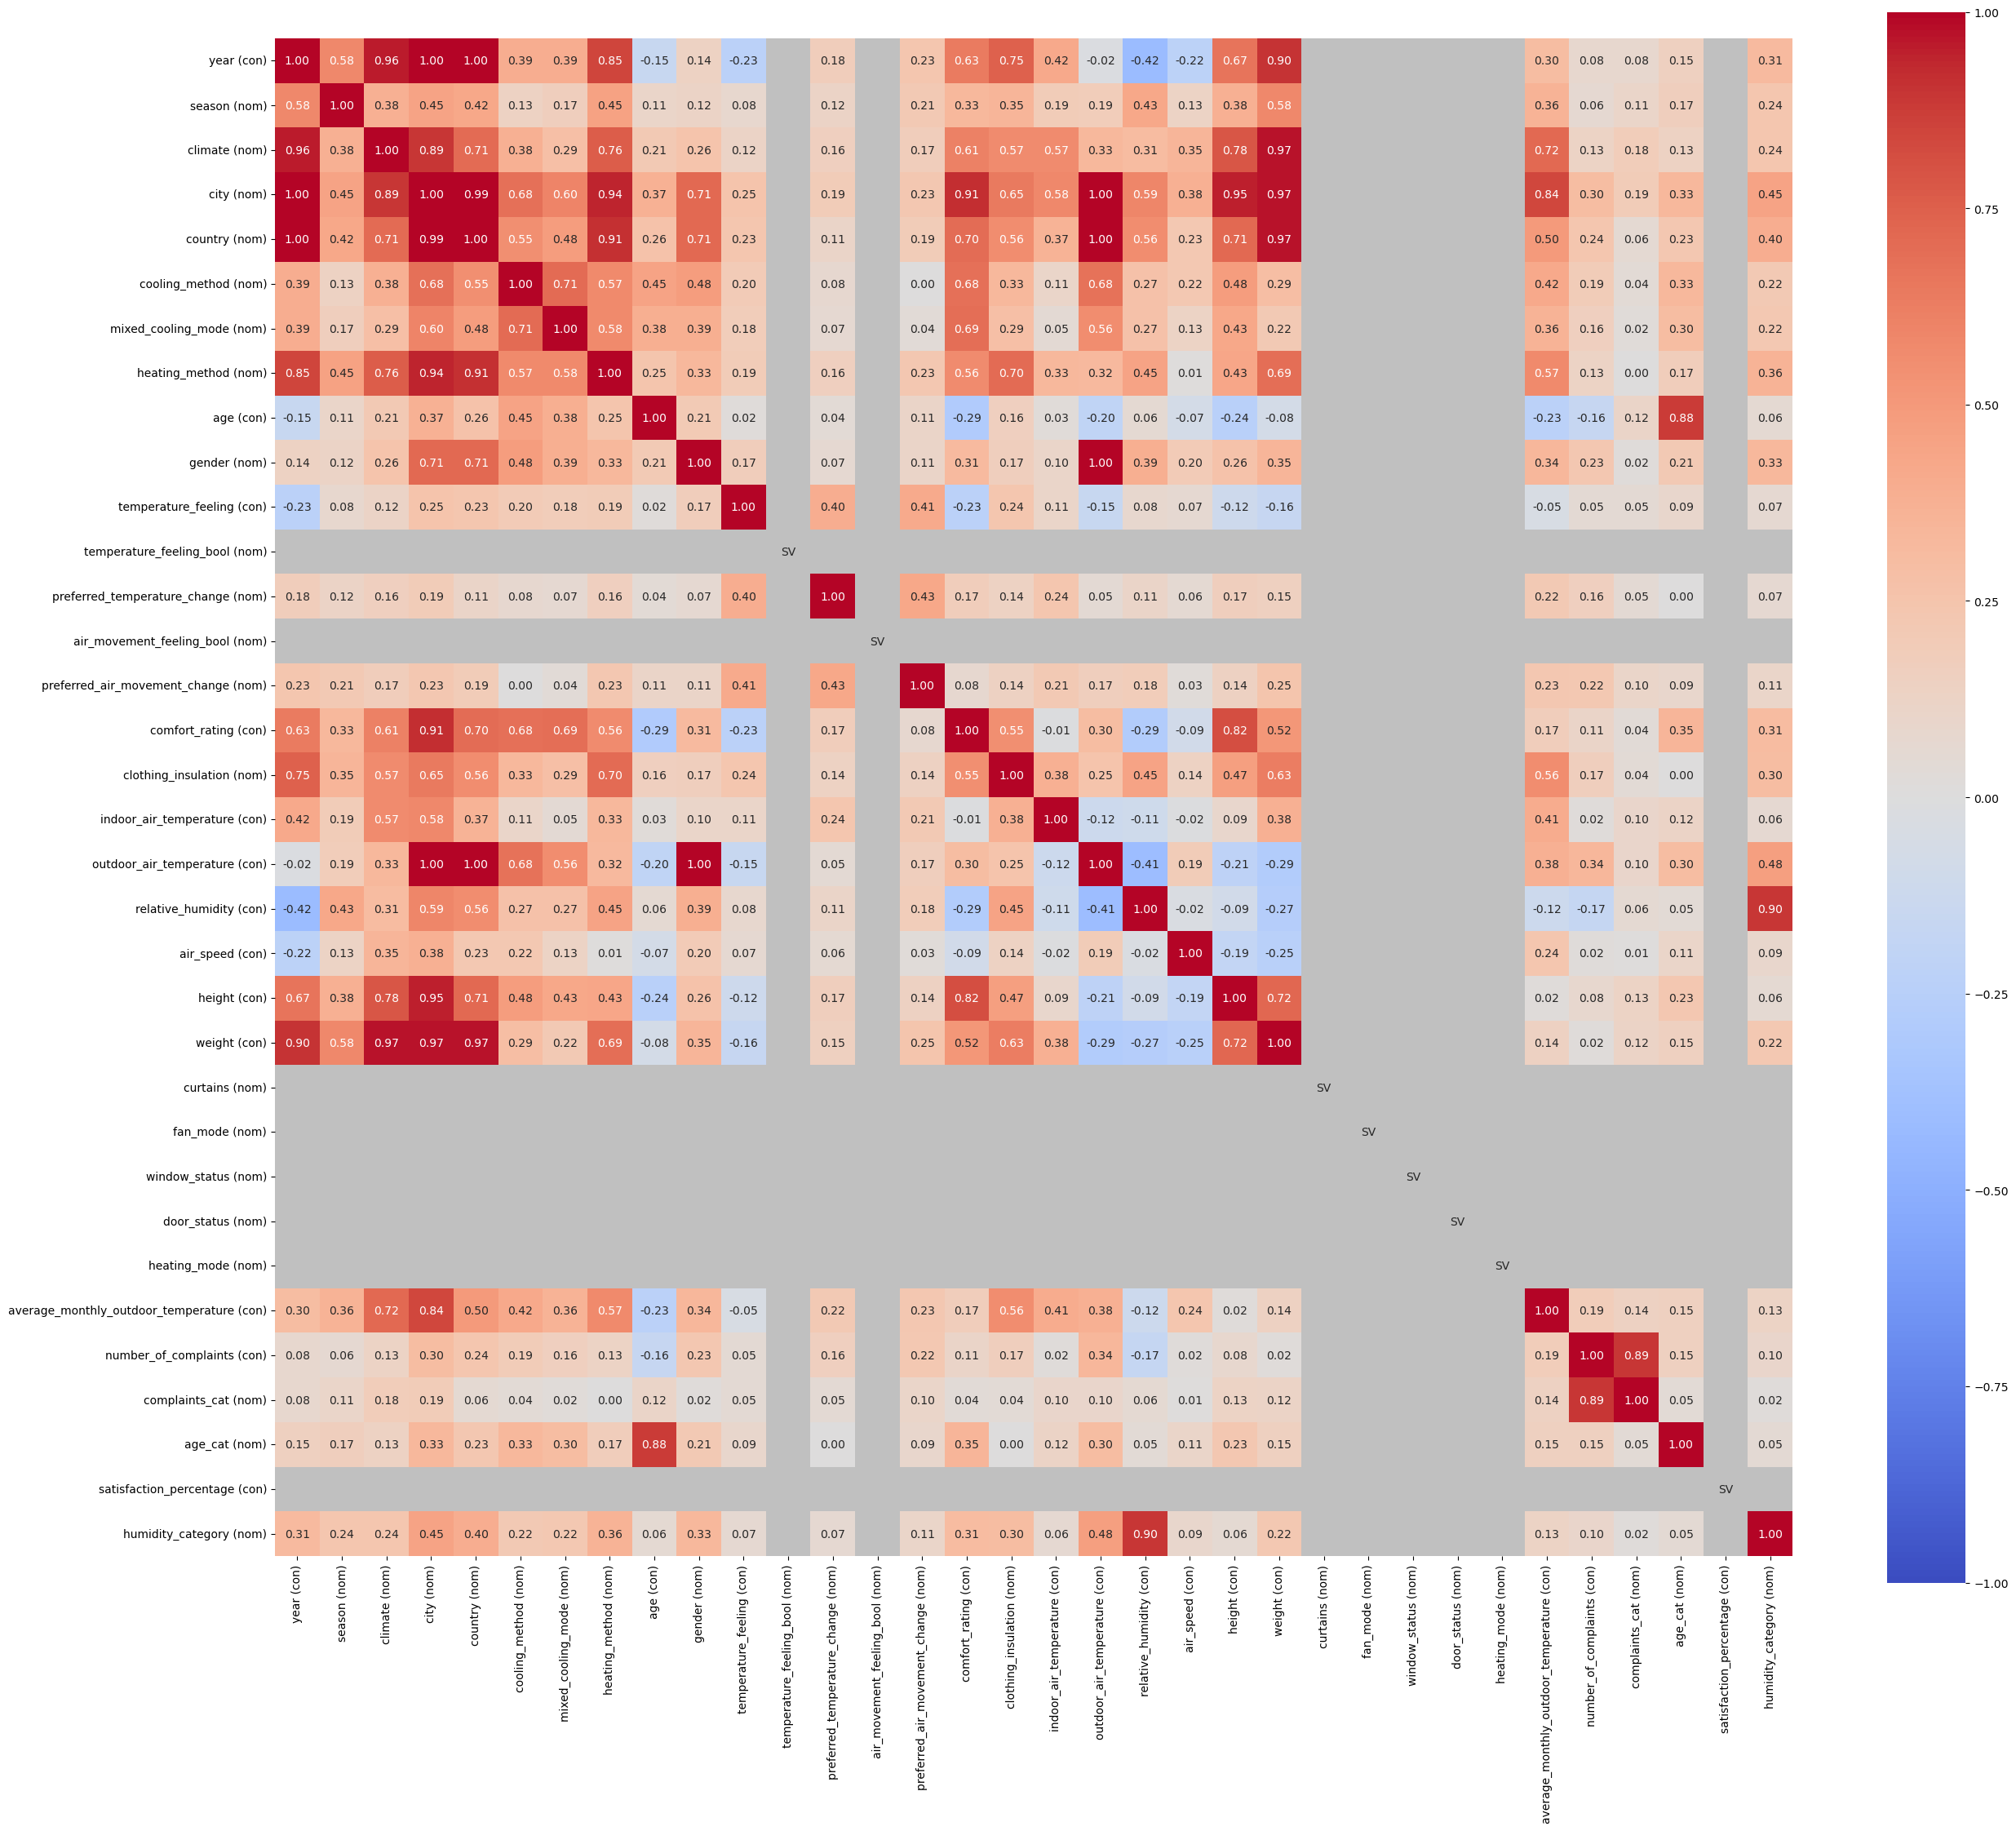

<Figure size 640x480 with 0 Axes>

In [64]:
plt.figure(figsize=(30, 25))
assoc_plot = associations(
    df,
    nominal_columns=cat_cols,
    mark_columns=True,
    num_num_assoc='spearman',
    nom_nom_assoc='cramer',
    nom_num_assoc='correlation_ratio',
    figsize=(30, 25),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True
)

plt.tight_layout()

plt.show()

По шкале Чеддока:
![image.png](attachment:image.png)

Корреляции с comfort_rating:
- year (заметная) - возможно со временем условия в офисе меняются, поэтому оценка коррелирует с годом
- climate (заметная) - оценка зависит от климата, вполне логично
- city/country (очень высокая, высокая) - скорее всего в разных городах/странах разная температура и разные возможности для контроля температуры в офисах, поэтому так
- cooling_method, mixed_cooling_mode, heating_method (заметная) - логично, от контроля температуры зависит комфорт, всё сходится
- height, weight (высокая, заметная) - возможно от роста и веса зависит восприятие температуры, а возможно просто особенность данных
- clothing_insulation (заметная) - оценка зависит от одежды, вполне логично
- fan_mode (заметная) - обычно вентилятор влияет на кофморт, всё логично

Интересные корреляции с indoor_temperature (понадобится для построения регрессионной модели):
- year, season, country, climate, city (заметная)
- cooling_method, mixed_cooling_mode, heating_method (слабое, слабое, умеренное) - почему-то довольно слабенько

# Построение регрессии

Построить регрессионную модель температуры воздуха в помещении в зависимости от типа охлаждения и других значимых факторов. Выбор факторов - на усмотрение исполнителя.

In [65]:
df = pd.read_csv('data/cleared_data.csv')

df.head()

,year,season,climate,city,country,cooling_method,mixed_cooling_mode,heating_method,age,gender,temperature_feeling,temperature_feeling_bool,preferred_temperature_change,air_movement_feeling_bool,preferred_air_movement_change,comfort_rating,clothing_insulation,indoor_air_temperature,outdoor_air_temperature,relative_humidity,air_speed,height,weight,curtains,fan_mode,window_status,door_status,heating_mode,average_monthly_outdoor_temperature,number_of_complaints
0,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,22,Unknown,0.0,приемлемо,Без изменений,NaN,Без изменений,4.0,среднее,22.9,22.8,48.9,0.26,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,28.9,0
1,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,42,Unknown,1.0,приемлемо,Без изменений,NaN,Без изменений,5.0,среднее,25.6,24.5,34.7,0.08,NaN,NaN,открыто,выключен,нет данных,нет данных,нет данных,32.8,0
2,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,27,Unknown,0.0,приемлемо,Без изменений,NaN,Без изменений,5.0,среднее,24.0,23.9,34.8,0.21,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,28.9,0
3,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,32,Unknown,-1.0,приемлемо,Теплее,NaN,Меньше,4.0,среднее,24.7,24.8,42.2,0.10,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,32.8,0
4,2011,Лето,Cубтропический океанический,Техас,США,Кондиционирование,not applicable,No mechanical heating,43,Unknown,0.0,приемлемо,Без изменений,NaN,Без изменений,5.0,среднее,25.5,25.5,34.7,0.15,NaN,NaN,закрыто,включен,нет данных,нет данных,нет данных,32.8,0


In [66]:
df.isna().sum()

year                                     0
season                                   0
climate                                  0
city                                     0
country                                  0
cooling_method                           0
mixed_cooling_mode                       0
heating_method                           0
age                                      0
gender                                   0
temperature_feeling                      0
temperature_feeling_bool                 0
preferred_temperature_change             0
air_movement_feeling_bool              253
preferred_air_movement_change            0
comfort_rating                         268
clothing_insulation                      0
indoor_air_temperature                   0
outdoor_air_temperature                406
relative_humidity                        0
air_speed                                0
height                                 312
weight                                 241
curtains   

In [67]:
df = df.dropna(axis=1)

In [68]:
df.shape

(450, 25)

Всего 372 наблюдения, значит должно быть не больше 37 признаков.

Основываясь на корреляции между параметрами, я выбрал признаки:
- season
- climate
- cooling_method
- heating_method
- relative_humidity
- air_speed
- fan_mode
- window_status
- door_status
- heating_mode


In [69]:
df.columns

Index(['year', 'season', 'climate', 'city', 'country', 'cooling_method',
       'mixed_cooling_mode', 'heating_method', 'age', 'gender',
       'temperature_feeling', 'temperature_feeling_bool',
       'preferred_temperature_change', 'preferred_air_movement_change',
       'clothing_insulation', 'indoor_air_temperature', 'relative_humidity',
       'air_speed', 'curtains', 'fan_mode', 'window_status', 'door_status',
       'heating_mode', 'average_monthly_outdoor_temperature',
       'number_of_complaints'],
      dtype='object')

In [70]:
X = df[['season', 'climate', 'cooling_method', 'heating_method', 'relative_humidity', 'air_speed', 'fan_mode', 'window_status', 'door_status', 'heating_mode']]
y = df['indoor_air_temperature']

In [71]:
X.head()

,season,climate,cooling_method,heating_method,relative_humidity,air_speed,fan_mode,window_status,door_status,heating_mode
0,Лето,Cубтропический океанический,Кондиционирование,No mechanical heating,48.9,0.26,включен,нет данных,нет данных,нет данных
1,Лето,Cубтропический океанический,Кондиционирование,No mechanical heating,34.7,0.08,выключен,нет данных,нет данных,нет данных
2,Лето,Cубтропический океанический,Кондиционирование,No mechanical heating,34.8,0.21,включен,нет данных,нет данных,нет данных
3,Лето,Cубтропический океанический,Кондиционирование,No mechanical heating,42.2,0.10,включен,нет данных,нет данных,нет данных
4,Лето,Cубтропический океанический,Кондиционирование,No mechanical heating,34.7,0.15,включен,нет данных,нет данных,нет данных


In [72]:
X['climate'].value_counts()

climate
Cубтропический океанический         240
Тропическая влажная саванна          77
Жаркий полузасушливый                69
Влажный субтропический муссонный     34
Субтропическое высокогорье           29
Субтропический океанический           1
Name: count, dtype: int64

In [73]:
X.isna().sum()

season               0
climate              0
cooling_method       0
heating_method       0
relative_humidity    0
air_speed            0
fan_mode             0
window_status        0
door_status          0
heating_mode         0
dtype: int64

In [74]:
X.dtypes

season                object
climate               object
cooling_method        object
heating_method        object
relative_humidity    float64
air_speed            float64
fan_mode              object
window_status         object
door_status           object
heating_mode          object
dtype: object

In [75]:
not_categorical = X.select_dtypes(include=['int64', 'float64', 'bool'])
categorical = X.select_dtypes(include=['object', 'category'])

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_cat_encoded = encoder.fit_transform(categorical)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(categorical.columns))

final_X = pd.concat([not_categorical, X_cat_encoded_df], axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)

In [80]:
lin_regr = LinearRegression()

lin_regr.fit(X_train, y_train)

LinearRegression()

In [81]:
def metrics_model(fact, prediction):
    print(f'R2: {r2_score(fact, prediction)}')
    print(f'MAE: {mean_absolute_error(fact, prediction)}')
    print(f'MSE: {mean_squared_error(fact, prediction)}')
    print(f'MAPE: {mean_absolute_percentage_error(fact, prediction)}')

In [82]:
prediction_test = lin_regr.predict(X_test)

In [83]:
metrics_model(y_test, prediction_test)

R2: 0.4669344688875061
MAE: 1.2025324592263824
MSE: 2.599483532780573
MAPE: 0.05024576090903807


Проанализировав результаты регрессионой модели можно прийти к выводам:
- по заданным признакам невозможно достаточно точно предсказать температуру в помещении
- возможно стоит добавить признаков или изменить обработку текущих

# **Гипотезы**

In [ ]:
import pandas as pd
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kendalltau

p_value_const = 0.05

In [ ]:
df = pd.read_csv('./data/researched_data.csv', encoding='utf-8', sep=',', skipinitialspace=True)
df_comfort = df[df['comfort_rating'].notnull()]
df_comfort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 0 to 368
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           129 non-null    int64  
 1   year                                 129 non-null    int64  
 2   season                               129 non-null    object 
 3   climate                              129 non-null    object 
 4   city                                 129 non-null    object 
 5   country                              129 non-null    object 
 6   cooling_method                       129 non-null    object 
 7   mixed_cooling_mode                   129 non-null    object 
 8   heating_method                       129 non-null    object 
 9   age                                  129 non-null    int64  
 10  gender                               129 non-null    object 
 11  temperature_feeling                  

## Влияет ли способ охлаждения на оценку комфорта?

Способ охлаждения - категориальная переменная.
Оценка комфорта - порядковая переменная.

Необходимо использовать один из непараметрических критериев. Возьмем критерий Краскела-Уоллеса, так как оценка рапределена ненормально (можно узнать из графика распределения), а так же способ охлаждения состоит более чем из 2-х категорий


### HO - медианы во всех подргуппах равны
### H1 - хотя бы в одной группе медианы не равны

In [ ]:
groups = df_comfort.groupby('cooling_method')['comfort_rating'].apply(list)


h_stat_kruskal, p_value_kruskal = st.kruskal(*groups)

if p_value_kruskal < p_value_const:
    print('Не можем полагаться на H0:', p_value_kruskal)
else:
    print('Можем полагаться на H0:', p_value_kruskal)

1.911883611188914e-11
Можем полагаться на H0: 0.1411805413766317


Хоть и статистически связь не обнаружена, из за небольшого кол-ва наблюдений ещё нельзя однозначно утвержать о независимости переменных

## Влияет ли способ пол на оценку комфорта?

Пол - категориальная переменная.
Оценка комфорта - порядковая переменная.

Необходимо использовать один из непараметрических критериев. Возьмем критерий Манна-Уитни, так как оценка рапределена ненормально, а так же пол состоит из 2-х категорий


### HO - выборки в среднем распределены одинаково
### H1 - выборки в среднем распределены не одинаково

In [ ]:
woman_df = df_comfort[df_comfort['gender'] == 'Женский']['comfort_rating']
man_df = df_comfort[df_comfort['gender'] == 'Мужской']['comfort_rating']

h_stat_kruskal, p_value_kruskal = st.mannwhitneyu(woman_df, man_df, alternative='two-sided')

if p_value_kruskal < p_value_const:
    print('Не можем полагаться на H0:', p_value_kruskal)
else:
    print('Можем полагаться на H0:', p_value_kruskal)

Не можем полагаться на H0: 0.024754100155954806


Из этого следует, что распределение оценок между мужчинами и женщинами статистически значимо. Возможно, это может быть связано человеческим фактором, например девушки могут более остро реагировать на различия в температуре, чем мужчины.

## Влияет ли возрастная группа на оценку комфорта?

Возрастная группа - категориальная переменная.
Оценка комфорта - порядковая переменная.

Необходимо использовать один из непараметрических критериев. Возьмем критерий Краскела-Уоллеса, так как оценка рапределена ненормально, а возрастная группа состоит из 3-х категорий


### HO - медианы во всех подргуппах равны
### H1 - хотя бы в одной группе медианы не равны

In [ ]:
groups = df_comfort.groupby('age_cat')['comfort_rating'].apply(list)


h_stat_kruskal, p_value_kruskal = st.kruskal(*groups)

if p_value_kruskal < p_value_const:
    print('Не можем полагаться на H0:', p_value_kruskal)
else:
    print('Можем полагаться на H0:', p_value_kruskal)

Не можем полагаться на H0: 5.90411569454933e-05


0      0
1      0
2      0
3      0
4      0
      ..
363    0
364    0
366    0
367    0
368    0
Name: number_of_complaints, Length: 129, dtype: int64

Из этого следует, что в зависимости от возраста люди по разному могут реагировать на температуру. Возможно это так же связано с фатором чувствительности к возрасту.

## Есть ли взаимосвязь между количеством рекламаций и оценкой комфорта?

Количеством рекламаций - количественная переменная.
Оценка комфорта - порядковая переменная.

Для определения нормальности распределения колличества рекламаций воспользуемся тестом Шапиро.


### HO - Распределение переменной нормальное
### H1 - Распределение переменной не нормальное

In [ ]:
number_of_complaints = df_comfort['number_of_complaints']
p_value_shapiro = shapiro(number_of_complaints).pvalue
if p_value_shapiro < p_value_const:
    print('Не можем полагаться на H0:', p_value_shapiro)
else:
    print('Можем полагаться на H0:', p_value_shapiro)


Не можем полагаться на H0: 3.283783702973778e-21


Распределение у обеих переменных ненормальное, следовательно можем воспользоваться непараметрической корелляцией Спирмена или Кендаллом. В силу малого количества наблюдаемых данных воспользуемся последним

### H0 - Между переменными нету монотонной связи 
### H1 - Между переменными присутсвует монотонная связь

In [ ]:
kendall_pval = kendalltau(df_comfort['comfort_rating'], df_comfort['number_of_complaints']).pvalue

if kendall_pval < p_value_const:
    print('Не можем полагаться на H0:', p_value_shapiro)
else:
    print('Можем полагаться на H0:', p_value_shapiro)

Не можем полагаться на H0: 3.283783702973778e-21


Тест показал что скорее предположение о отсутвие монотонной связи между перменными слишком неправоподобно. Это вполне логично - чем больше жалоб на оборудование, тем ниже будет оценка.

## Проверить гипотезу о том, что средняя оценка комфорта отличается в зависимости от страны.

Cтрана - категориальная переменная.
Оценка комфорта - порядковая переменная.

Стран в датасете у нас всего 3, оценка комфорта распределена ненормально. Воспользуемся в таком случае критерием Краскела-Уоллеса.

### HO - медианы во всех подргуппах равны
### H1 - хотя бы в одной группе медианы не равны

In [ ]:
groups = df_comfort.groupby('country')['comfort_rating'].apply(list)


h_stat_kruskal, p_value_kruskal = st.kruskal(*groups)

if p_value_kruskal < p_value_const:
    print('Не можем полагаться на H0:', p_value_kruskal)
else:
    print('Можем полагаться на H0:', p_value_kruskal)

Не можем полагаться на H0: 2.5391114140787918e-05


Из результатов может следовать, что возможно культурные особенности или расположение конкретной страны могут влиять на общую оценку рейтинга комфорта. Или например эта зависимость бедности/богатства населения (например богатые могут быть более придирчивы к своим ощущениям температуры)

# **Допольнительные гипотезы.**

Рассмотрим связь включённого вентилятора и оценки комфорта. Включённый вентилятор может влиять на ощущение температуры, однако нужно установить как конкретно.

### Гипотеза: состояние вентилятора влияет на оценку комфорта.

Включённый вентилятор - бинарная переменная (2 подгруппы).
Оценка комфорта - ранговая (ненрмальная) переменная.

Для проверки гипотезы воспользуемся непараметрическим тестом Манна-Уитни.


HO - выборки в среднем распределены одинаково.

H1 - выборки в среднем распределены не одинаково.

In [ ]:
woman_df = df_comfort[df_comfort['fan_mode'] == 1]['comfort_rating']
man_df = df_comfort[df_comfort['fan_mode'] == 0]['comfort_rating']

h_stat_kruskal, p_value_kruskal = st.mannwhitneyu(woman_df, man_df, alternative='two-sided')

if p_value_kruskal < p_value_const:
    print('Не можем полагаться на H0:', p_value_kruskal)
else:
    print('Можем полагаться на H0:', p_value_kruskal)

Можем полагаться на H0: 0.975247791531865


Из гипотезы можем сделать вывод, что в среднем состояние вентилятора не влияет на среднюю оценку.

Проверим так же влияние некоторых факторов на ощущение температуры.

Перед началом работы проведём тест Шапиро для проверки нормальности распределения оценки

### HO - Распределение переменной нормальное
### H1 - Распределение переменной не нормальное

In [ ]:
temperature_feeling = df_comfort['temperature_feeling']
p_value_shapiro = shapiro(temperature_feeling).pvalue
if p_value_shapiro < p_value_const:
    print('Не можем полагаться на H0:', p_value_shapiro)
else:
    print('Можем полагаться на H0:', p_value_shapiro)

Не можем полагаться на H0: 9.383514727113557e-10


## Проверим гипотезу о том, что среднее ощущение температуры отличается в зависимости от способа охлаждения.

Для этого восспользуемся непараметрическим тестом Краскелла-Уолесса

### HO - медианы во всех подргуппах равны
### H1 - хотя бы в одной группе медианы не равны

In [ ]:
groups = df.groupby('cooling_method')['temperature_feeling'].apply(list)


h_stat_kruskal, p_value_kruskal = st.kruskal(*groups)

if p_value_kruskal < p_value_const:
    print('Не можем полагаться на H0:', p_value_kruskal)
else:
    print('Можем полагаться на H0:', p_value_kruskal)

Не можем полагаться на H0: 0.0021078838177852697


Выявили, что в среднем ощущение темпартуры отличается от метода охлаждения. Следовательно, доказано что от оборудования зависит конечное ощущение, что логично